# Loan Repayment Assessment in Banking
### Problem Statement:
Welcome to KnowledgeHut AI hackathon – Loan Repayment Assessment in Banking. You are required
to build and train a model that identifies a customer will repay or default from the loan dataset. This
dataset is included in loan data, and provides a challenging classifier that will test what you have learnt
in this course.
Task:
Your task is to build this model based on the details in this document and submit it. Please read the
details carefully before attempting this hackathon.
You will need to decide the following:
1. Use the specific source or dataset for assess loan repayment shared with you
2. What is your intended data split ratio for training, validation, and test sets for the loan dataset? How
do you plan to ensure randomness in this split?
3. Do you plan to explore the importance of these components further?
4. Do you anticipate class imbalance in the 'loan_status' feature, where
Paid: Applicant has fully paid the loan (the principal and the interest rate)
Defaulted: Applicant has not paid the installments in due time for a long period of time, i.e. Client
has defaulted on the loan
If so, how will you address this imbalance?
5. Will you normalize the features? If yes, what normalization techniques do you have in mind?
6. Do you intend to perform data preprocessing tasks such as outlier detection, missing value handling,
or feature selection before training your model.


* ✓Statistics descriptive analysis
* ✓EDA
* ✓Data preprocessing
* ✓Feature scaling
* ✓Feature engineering
* ✓Feature selection
* ✓Build model
* ✓Ensemble techniques - Bagging, Boosting
* ✓Cross validation
* ✓Grid search, Tuning Hyper parameters
*

```
# This is formatted as code
```

✓Evaluation metric: F1 - Score

## Data Description of Features

### Column Descriptions

- **earliest_cr_line**: The month the borrower's earliest reported credit line was opened.
- **emp_title**: The job title supplied by the Borrower when applying for the loan.
- **fico_range_high**: The upper boundary range the borrower’s FICO at loan origination belongs to.
- **fico_range_low**: The lower boundary range the borrower’s FICO at loan origination belongs to.
- **Grade**: LC assigned loan grade.
- **application_type**: Indicates whether the loan is an individual application or a joint application with two co-borrowers.
- **initial_list_status**: The initial listing status of the loan. Possible values are – W, F.
- **num_actv_bc_tl**: Number of currently active bankcard accounts.
- **mort_acc**: Number of mortgage accounts.
- **tot_cur_bal**: Total current balance of all accounts.
- **open_acc**: The number of open credit lines in the borrower's credit file.
- **pub_rec**: Number of derogatory public records.
- **pub_rec_bankruptcies**: Number of public record bankruptcies.
- **Purpose**: A category provided by the borrower for the loan request.
- **revol_bal**: Total credit revolving balance.
- **Title**: The loan title provided by the borrower.
- **total_acc**: The total number of credit lines currently in the borrower's credit file.
- **verification_status**: Indicates if income was verified by LC, not verified, or if the income source was verified.
- **addr_state**: The state provided by the borrower in the loan application.
- **annual_inc**: The self-reported annual income provided by the borrower during registration.
- **emp_length**: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- **home_ownership**: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- **int_rate**: Interest Rate on the loan.
- **loan_amnt**: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- **sub_grade**: LC assigned loan subgrade.
- **Term**: The number of payments on the loan. Values are in months and can be either 36 or 60.
- **revol_util**: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

### Target

- **loan_status**: Status of the loan.

### Test Data

- **test_loan_data.csv**: This dataset can be used to test model.


# import the  libraries for Data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('train_loan_data (1).csv')
df.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0           Jul-97  10+ years   
1         CA     40000.0           Apr-87  10+ years   
2         FL     60000.0           Aug-07  10+ years   
3         IL    100742.0           Sep-80  10+ years   
4         MD     80000.0           Jul-99  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy              744             740     E   
1  Department of Veterans Affairs              724             720     B   
2                Marble polishing              679             675     B   
3                         printer              664             660     B   
4                   Southern Mgmt              669             665     F   

  home_ownership application_type  ... pub_rec_bankruptcies  \
0       MORTGAGE       Individual  ...                  0.0   
1           RENT       Individual  ...                  0.0   
2       MORTGAGE       Individual  ...                  0.0   
3       MORTGAGE       Individual  ...                  0.0   
4           RENT       Individual  ...                  0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation       5338        93.6         E1   60 months   
1  debt_consolidation      19944        60.3         B1   36 months   
2  debt_consolidation      23199        88.5         B5   36 months   
3  debt_consolidation      18425        69.0         B2   36 months   
4  debt_consolidation      34370        90.0         F5   60 months   

                 title  total_acc  verification_status loan_status  
0   Debt consolidation          8      Source Verified   Defaulted  
1          Credit Loan         12             Verified        Paid  
2   Debt consolidation         16      Source Verified        Paid  
3   Debt consolidation         19      Source Verified        Paid  
4  Debt Connsolidation         59             Verified        Paid  

[5 rows x 28 columns]

# Statistics descriptive analysis


In [3]:
df.shape

(80000, 28)

here we find the shape of the trainig data this data set have total number of rows is equale to 80000 and number of columns 28

In [4]:
# know here we using the describe function to find the statistical summary of the entire numerical data from the total data
df.describe().T

count           mean            std     min       25%  \
annual_inc            80000.0   76046.143138   69020.055377    0.00  46000.00   
fico_range_high       80000.0     699.987975      31.734840  664.00    674.00   
fico_range_low        80000.0     695.987813      31.734075  660.00    670.00   
int_rate              80000.0      13.232898       4.771705    5.31      9.75   
loan_amnt             80000.0   14403.867813    8703.826298  750.00   7925.00   
num_actv_bc_tl        76052.0       3.633790       2.262505    0.00      2.00   
mort_acc              77229.0       1.674759       2.005104    0.00      0.00   
tot_cur_bal           76052.0  141586.358991  159371.366632    0.00  29642.00   
open_acc              80000.0      11.605675       5.483362    1.00      8.00   
pub_rec               80000.0       0.216675       0.579854    0.00      0.00   
pub_rec_bankruptcies  79969.0       0.137103       0.383202    0.00      0.00   
revol_bal             80000.0   16289.340975   22649.147472    0.00   5965.75   
revol_util            79947.0      51.899142      24.504836    0.00     33.50   
total_acc             80000.0      25.036875      12.009194    2.00     16.00   

                           50%        75%         max  
annual_inc            65000.00   90000.00  7141778.00  
fico_range_high         694.00     714.00      850.00  
fico_range_low          690.00     710.00      845.00  
int_rate                 12.74      15.99       30.99  
loan_amnt             12000.00   20000.00    40000.00  
num_actv_bc_tl            3.00       5.00       32.00  
mort_acc                  1.00       3.00       32.00  
tot_cur_bal           81000.50  211027.25  5172185.00  
open_acc                 11.00      14.00       80.00  
pub_rec                   0.00       0.00       24.00  
pub_rec_bankruptcies      0.00       0.00        7.00  
revol_bal             11111.00   19635.00  1023940.00  
revol_util               52.20      70.80      152.60  
total_acc                23.00      32.00      162.00

In [5]:
# here we usinhg the shape function for getting the more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

in this data set we can easily see the number of values is missing into the given data set missing values three columns have objects data type ,and  five columns have float dta types so the total number of columns which have missing values is eight columns

In [6]:
df['loan_status'].value_counts()/len(df)*100

loan_status
Paid         80.0375
Defaulted    19.9625
Name: count, dtype: float64

### convert the loan status into the 0 and 1 and dataset is imbalance need to equal the dataset

## EDA (Exploratory Data Analysis)

EDA is primarily about understanding the dataset. It involves:

### Understanding the Data Structure
- Getting to know the types of data, such as numerical, categorical, and the distribution of data.

### Identifying Patterns and Relationships
- Using visualizations and statistical methods to uncover patterns, trends, and relationships between variables.

### Detecting  Outliers
- Finding unusual data points that might need special attention.


### *Understanding the Data Structure*


## finding the null values into the dataset

In [7]:
# know here we check the total number of missing values into the dataset into the percentage
df.isnull().sum()/df.shape[0]*100

addr_state              0.00000
annual_inc              0.00000
earliest_cr_line        0.00000
emp_length              5.73500
emp_title               6.27250
fico_range_high         0.00000
fico_range_low          0.00000
grade                   0.00000
home_ownership          0.00000
application_type        0.00000
initial_list_status     0.00000
int_rate                0.00000
loan_amnt               0.00000
num_actv_bc_tl          4.93500
mort_acc                3.46375
tot_cur_bal             4.93500
open_acc                0.00000
pub_rec                 0.00000
pub_rec_bankruptcies    0.03875
purpose                 0.00000
revol_bal               0.00000
revol_util              0.06625
sub_grade               0.00000
term                    0.00000
title                   1.21250
total_acc               0.00000
verification_status     0.00000
loan_status             0.00000
dtype: float64

We can easily see the percentage of missing values ​​in the total values.

## Here we further differentiate between numerical values ​​and categorical values


In [8]:
# Here we further differentiate between numerical values ​​and categorical values## calc#ulation
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [9]:
df[numerical_columns].head()

annual_inc  fico_range_high  fico_range_low  int_rate  loan_amnt  \
0     85000.0              744             740     18.99      18075   
1     40000.0              724             720     10.16       8800   
2     60000.0              679             675     11.47      18000   
3    100742.0              664             660      9.16      20000   
4     80000.0              669             665     23.83      35000   

   num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc  pub_rec  \
0             1.0       1.0     319479.0         7        0   
1             4.0       0.0      19944.0         5        0   
2             4.0       2.0      23199.0         7        0   
3             4.0       1.0      72651.0        12        0   
4            14.0       7.0      64631.0        23        0   

   pub_rec_bankruptcies  revol_bal  revol_util  total_acc  
0                   0.0       5338        93.6          8  
1                   0.0      19944        60.3         12  
2                   0.0      23199        88.5         16  
3                   0.0      18425        69.0         19  
4                   0.0      34370        90.0         59

In [10]:
df[categorical_columns].head()

addr_state earliest_cr_line emp_length                       emp_title  \
0         CO           Jul-97  10+ years                          Deputy   
1         CA           Apr-87  10+ years  Department of Veterans Affairs   
2         FL           Aug-07  10+ years                Marble polishing   
3         IL           Sep-80  10+ years                         printer   
4         MD           Jul-99  10+ years                   Southern Mgmt   

  grade home_ownership application_type initial_list_status  \
0     E       MORTGAGE       Individual                   w   
1     B           RENT       Individual                   w   
2     B       MORTGAGE       Individual                   w   
3     B       MORTGAGE       Individual                   w   
4     F           RENT       Individual                   f   

              purpose sub_grade        term                title  \
0  debt_consolidation        E1   60 months   Debt consolidation   
1  debt_consolidation        B1   36 months          Credit Loan   
2  debt_consolidation        B5   36 months   Debt consolidation   
3  debt_consolidation        B2   36 months   Debt consolidation   
4  debt_consolidation        F5   60 months  Debt Connsolidation   

  verification_status loan_status  
0     Source Verified   Defaulted  
1            Verified        Paid  
2     Source Verified        Paid  
3     Source Verified        Paid  
4            Verified        Paid

here into the plot we can easily see the most off the numerical features affacted by the outlire so we use the meadian not mean

### cheching the duplicate values into the dataset

In [11]:
# here check the duplicated values
df.duplicated().sum()

0

This dataset did not have any duplicate values

## Identifying Patterns and Relationships


# Using the sweetviz
Here we import sweetviz to analysis the the data

In [12]:
df1=df.copy()

df1['loan_status'].value_counts()

loan_status
Paid         64030
Defaulted    15970
Name: count, dtype: int64

In [13]:
df1['loan_status'] = df1['loan_status'].apply(lambda x: 1 if x == 'Paid' else 0)
df1['loan_status'].value_counts()


loan_status
1    64030
0    15970
Name: count, dtype: int64

In [ ]:
! pip install sweetviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 50.3 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


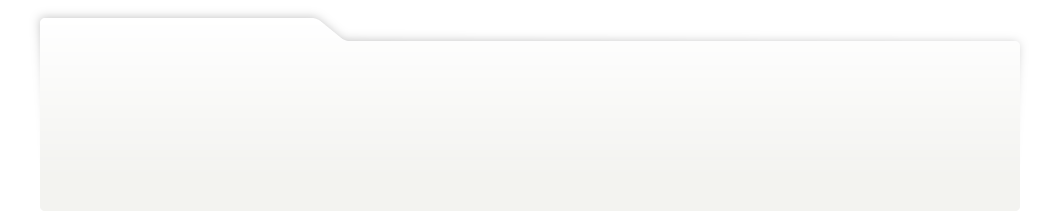
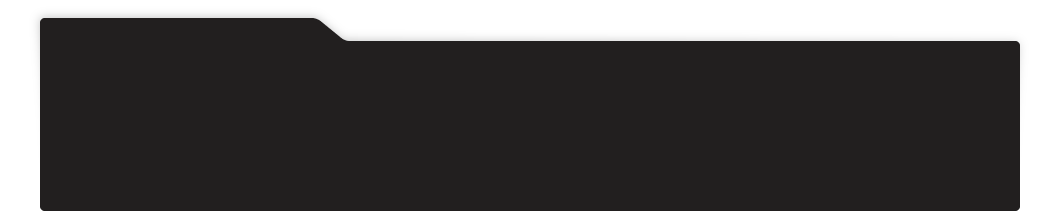
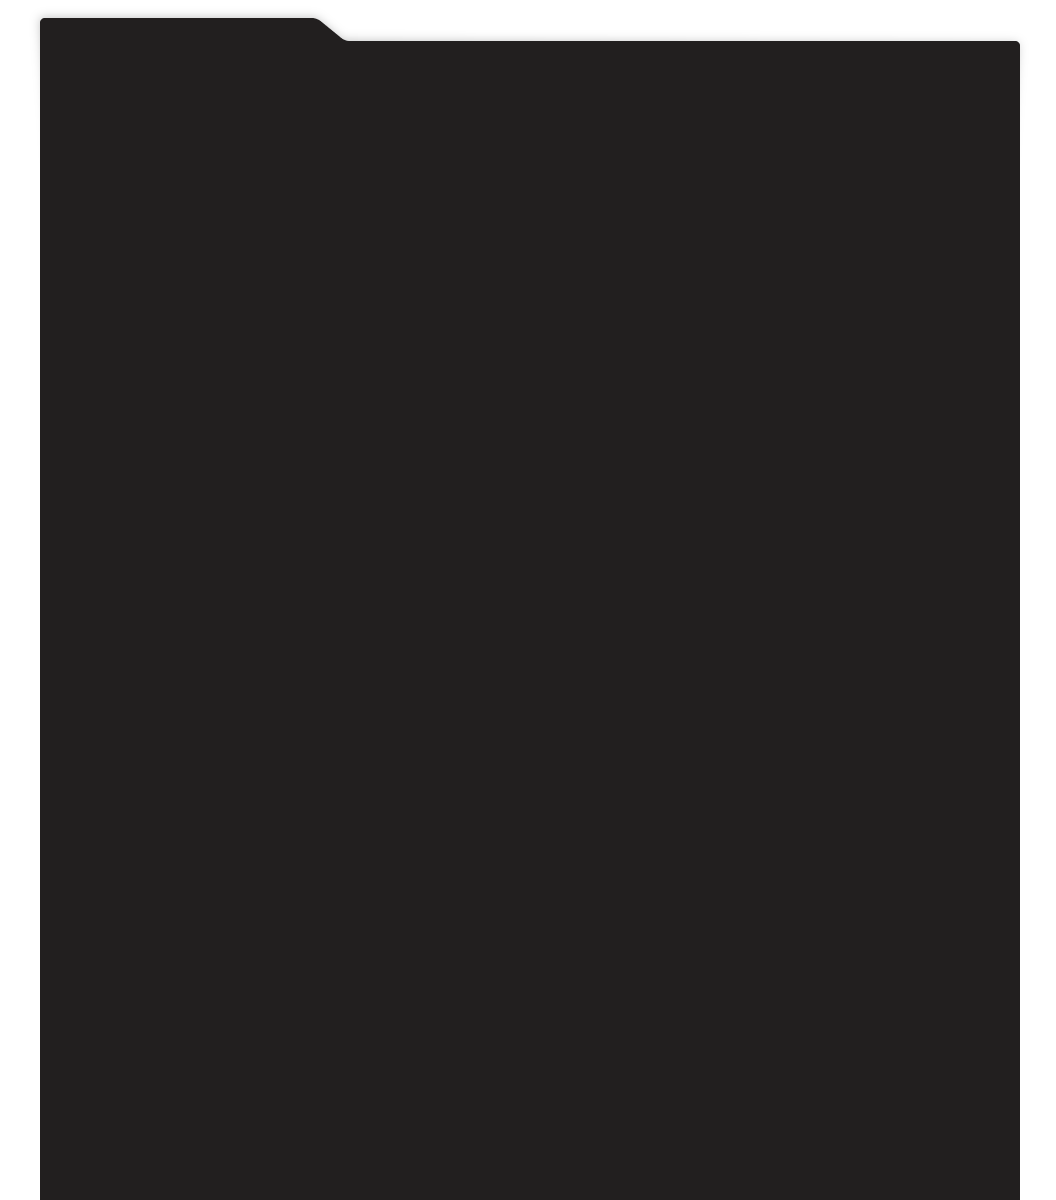
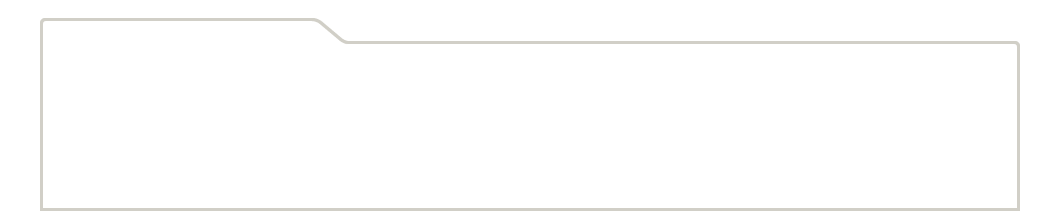
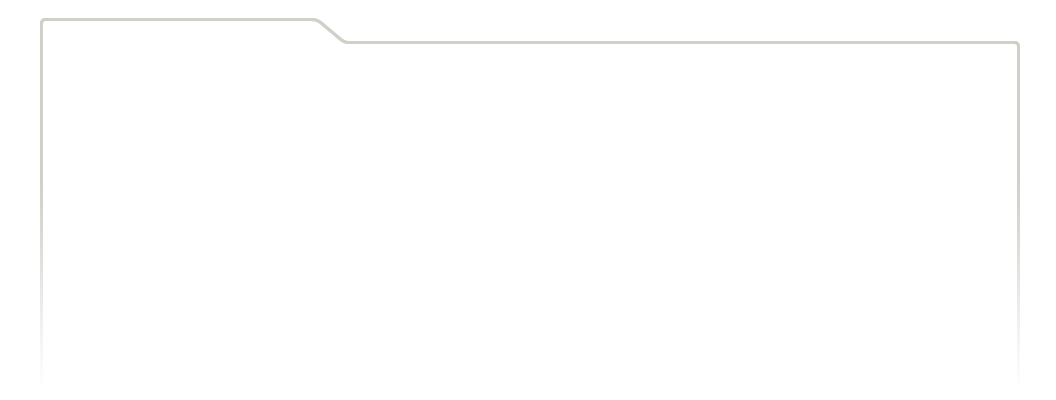
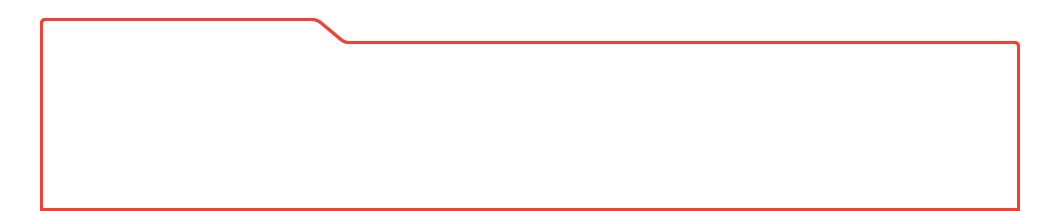
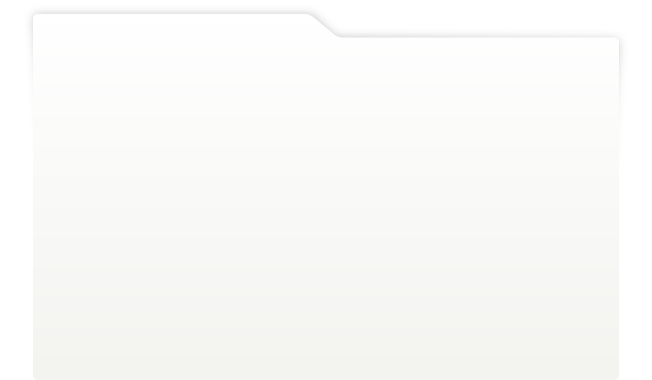
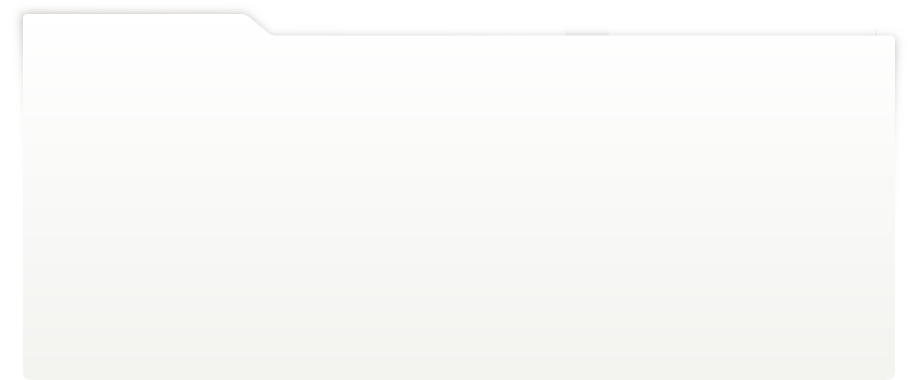
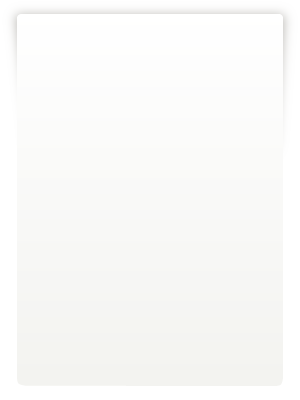
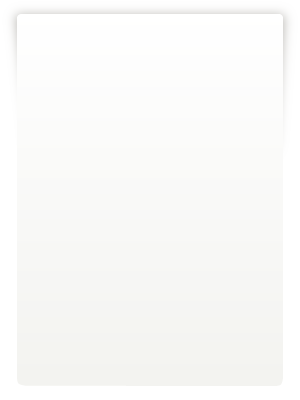
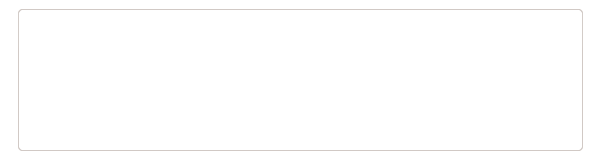
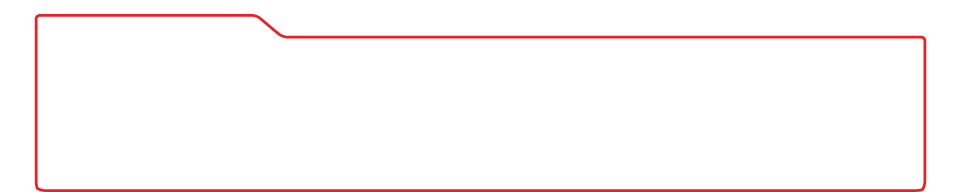
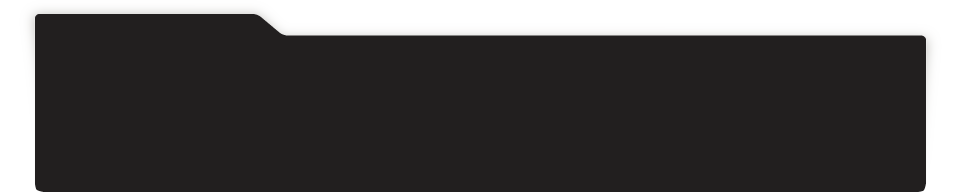
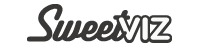
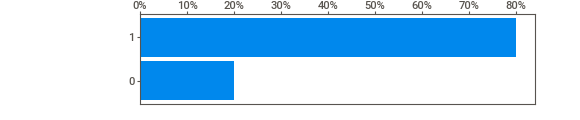
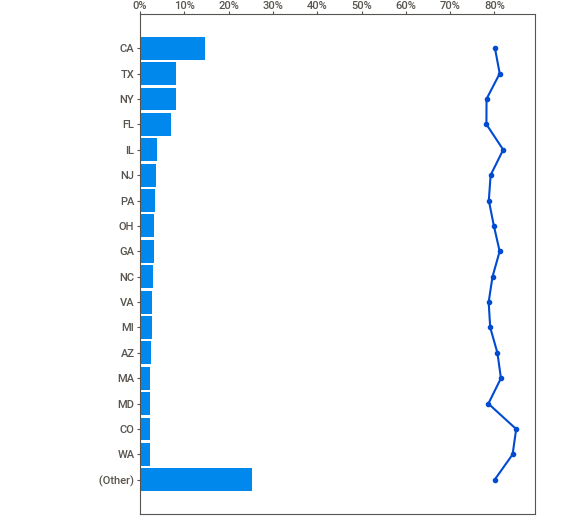
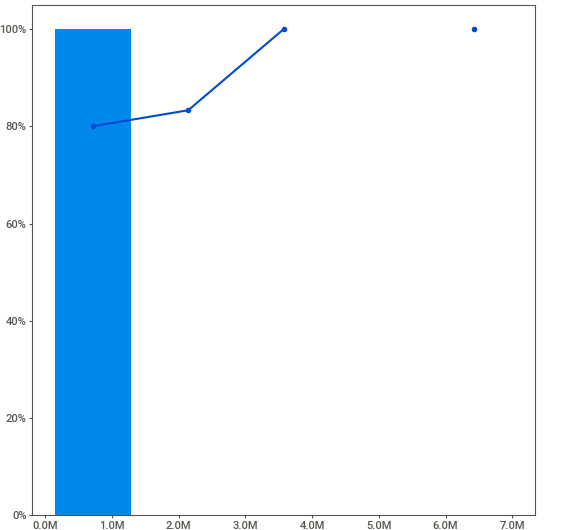
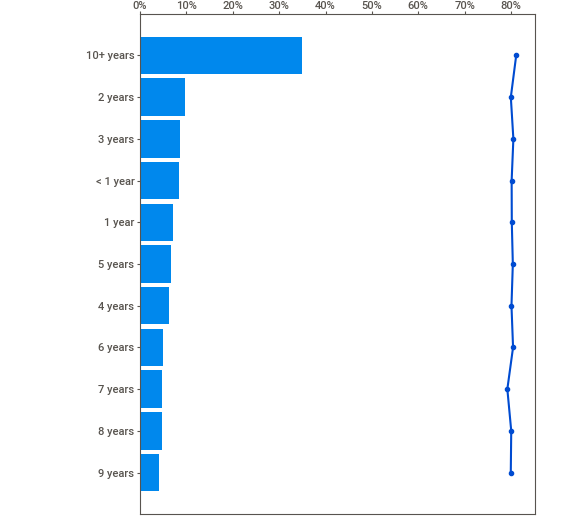
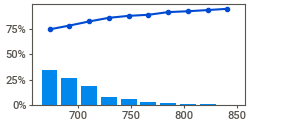
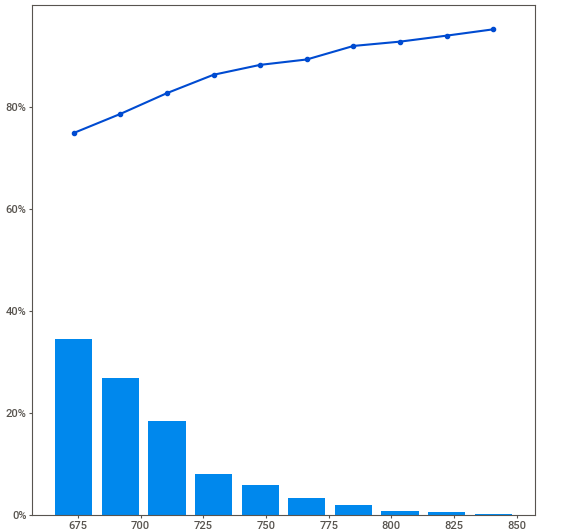
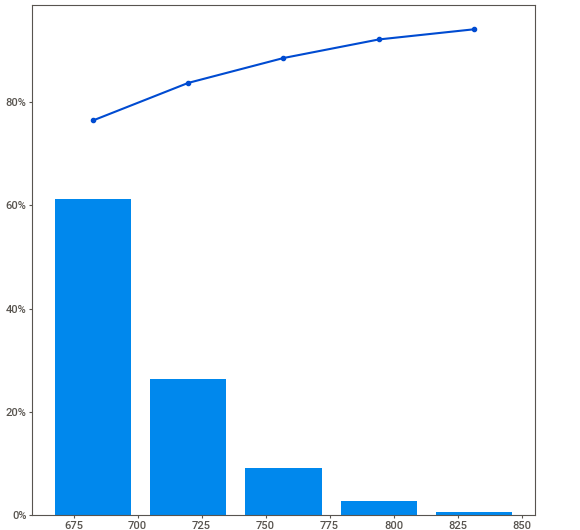
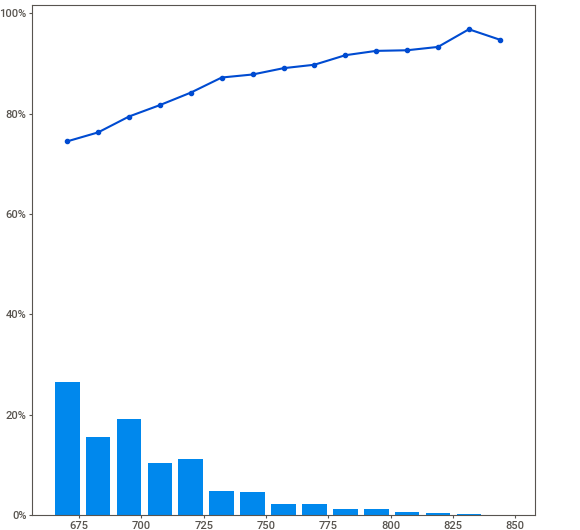
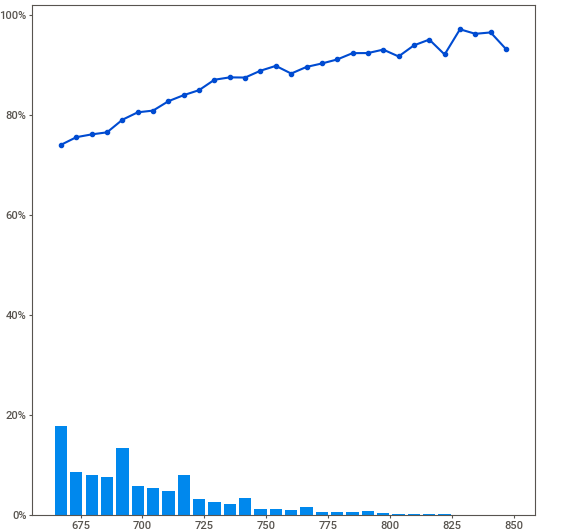
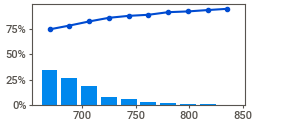
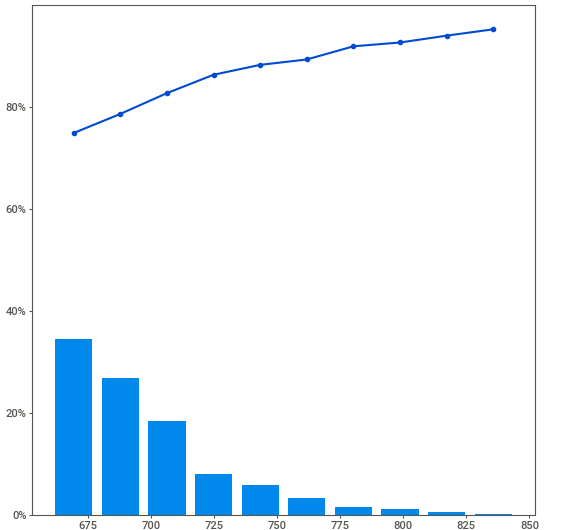
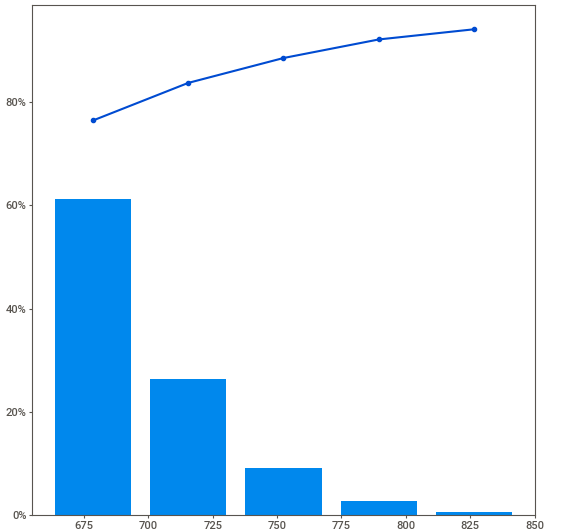
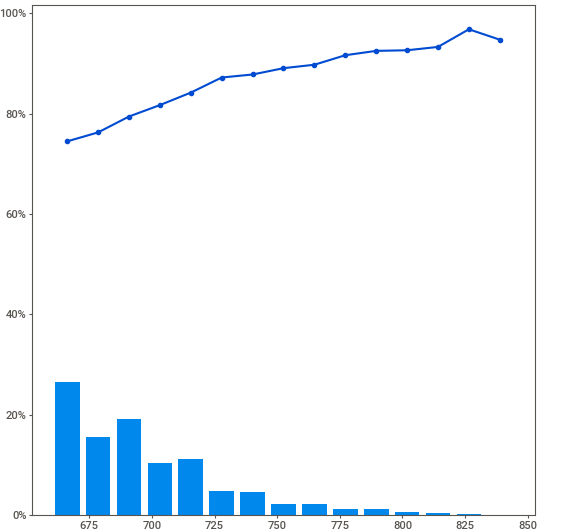
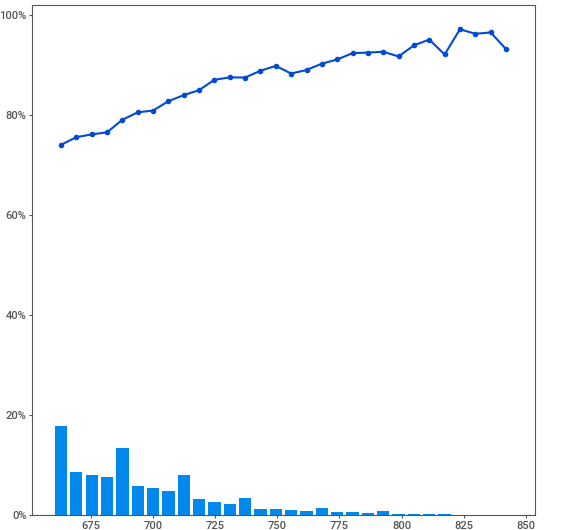
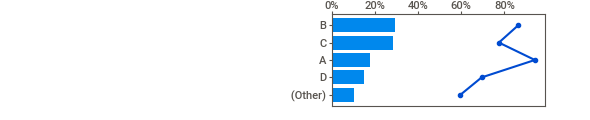
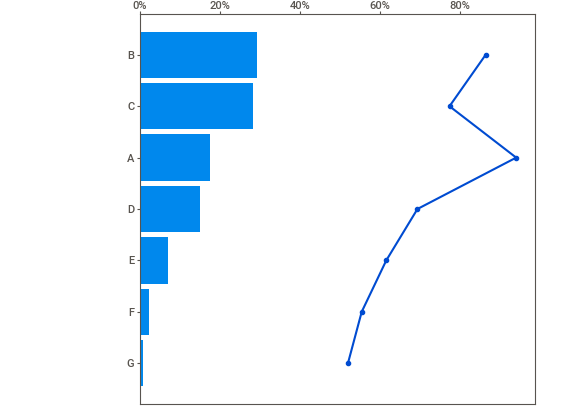
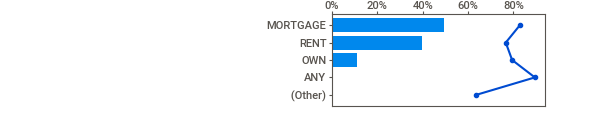
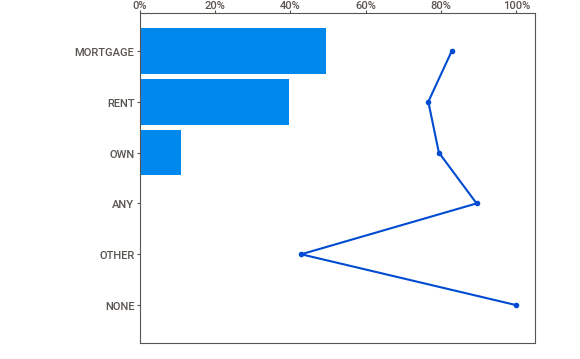
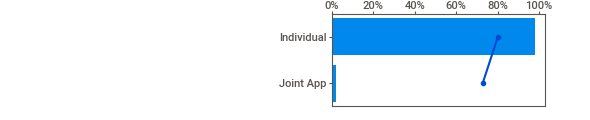
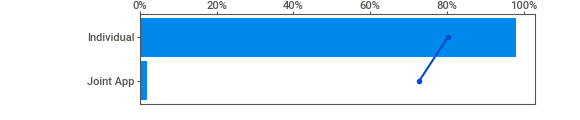
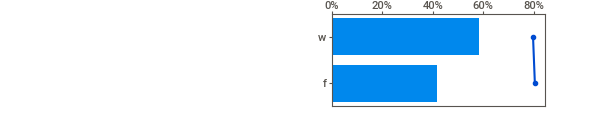
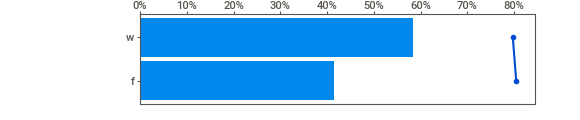
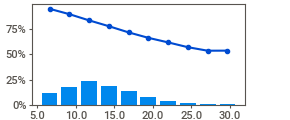
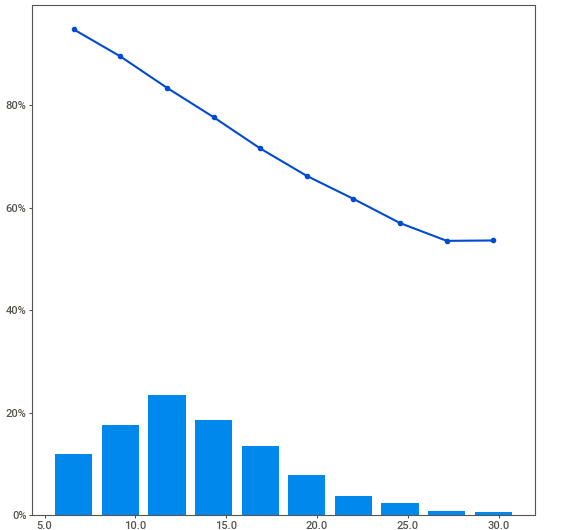
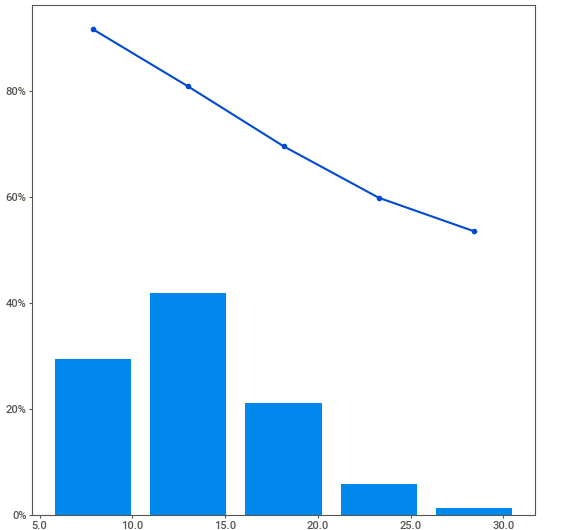
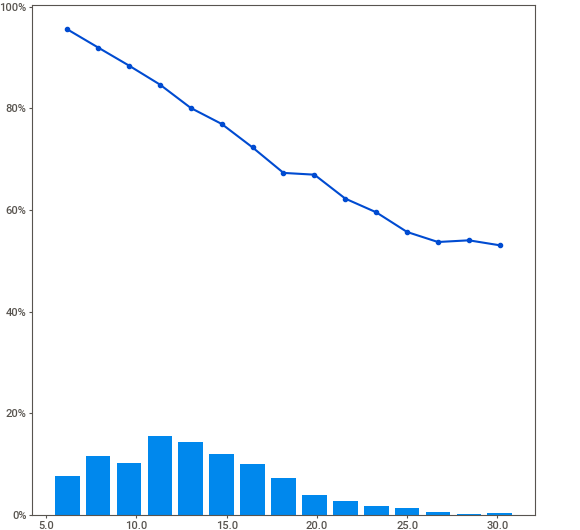
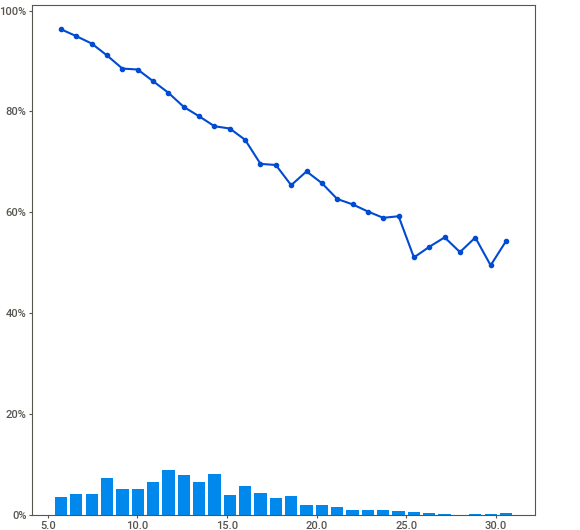
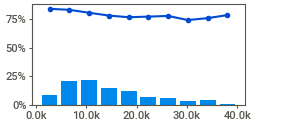
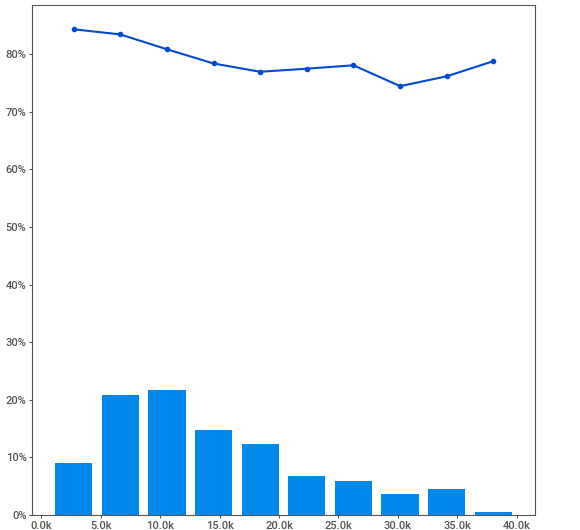
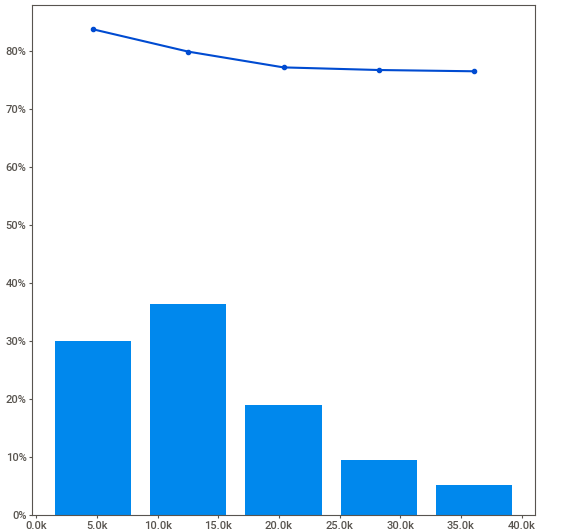
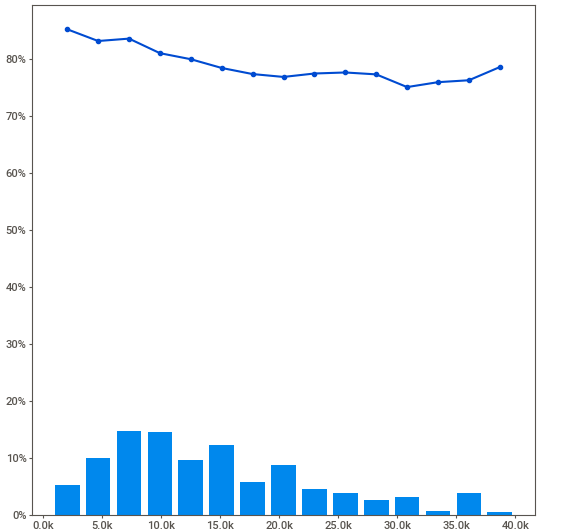
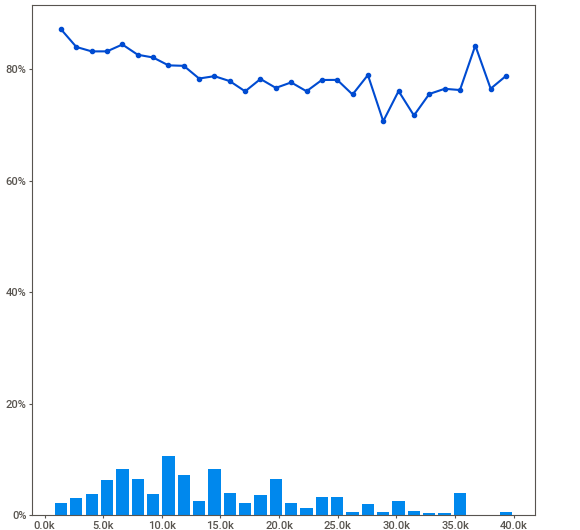
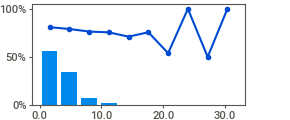
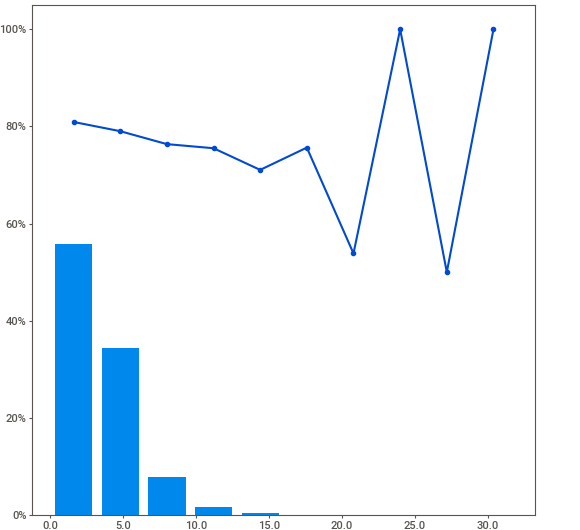
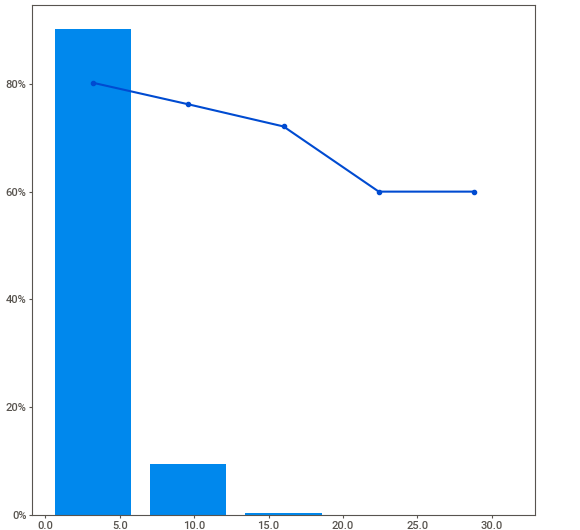
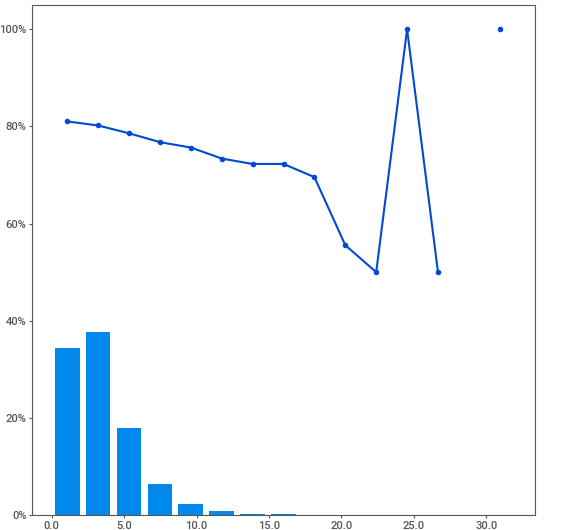
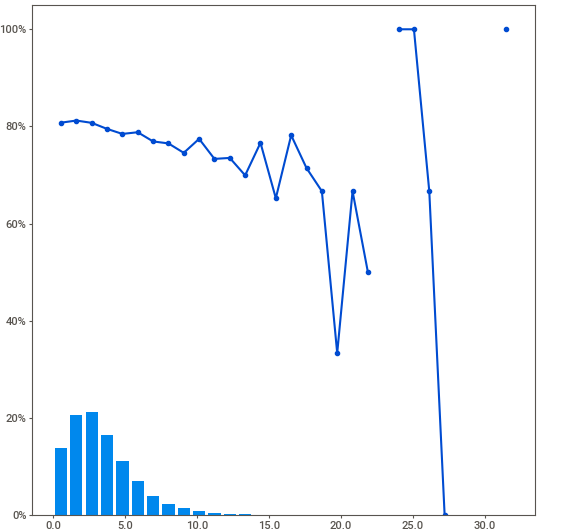
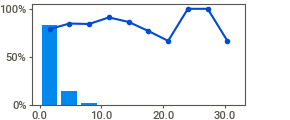
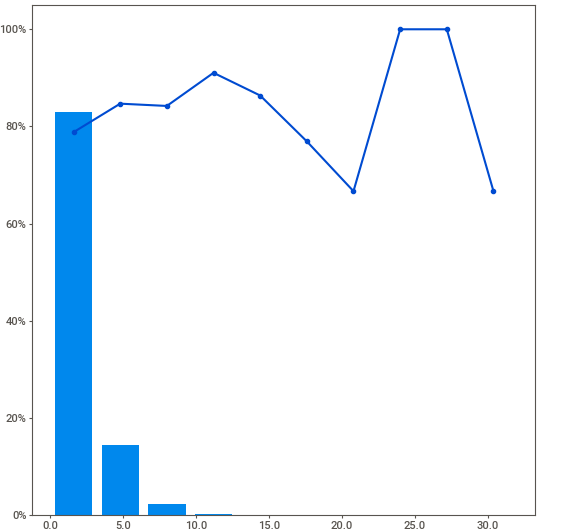
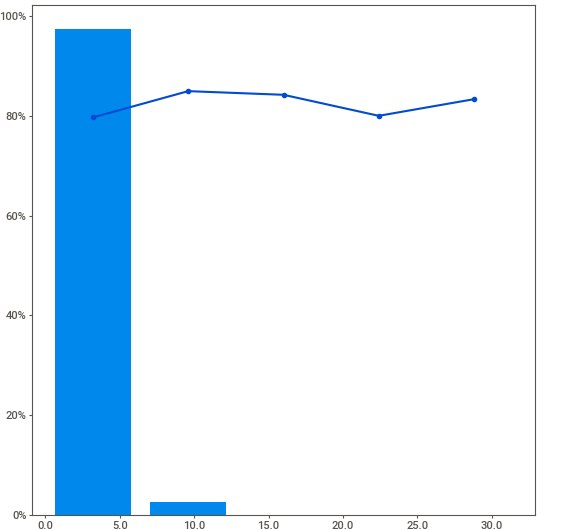
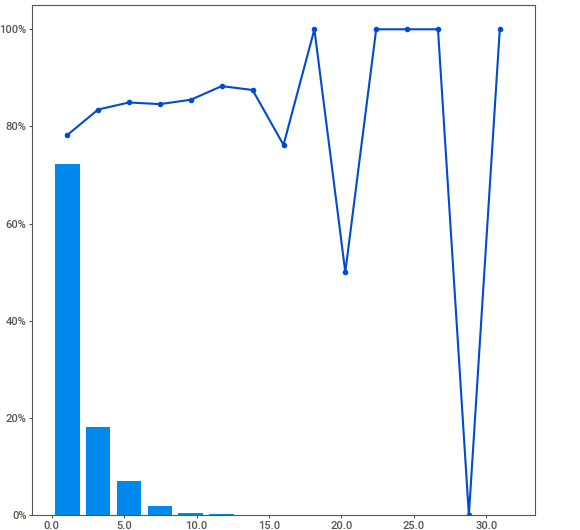
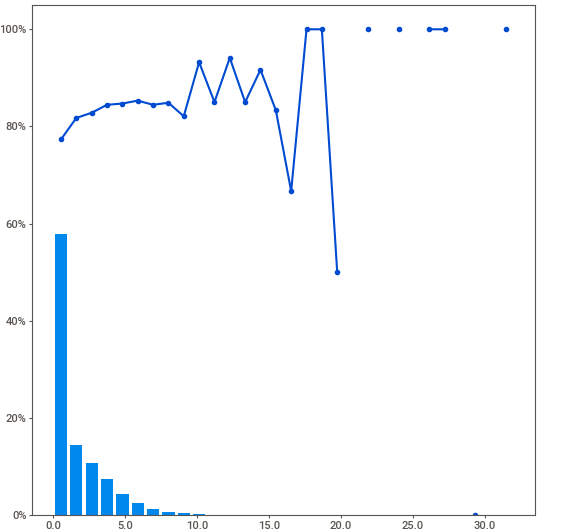
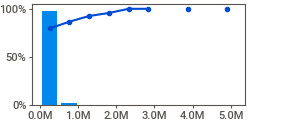
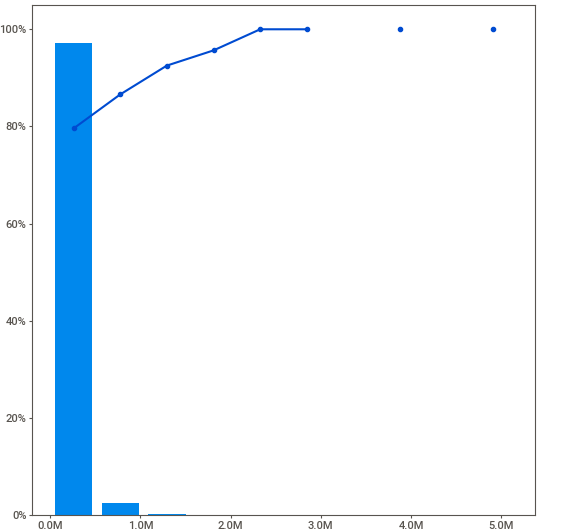
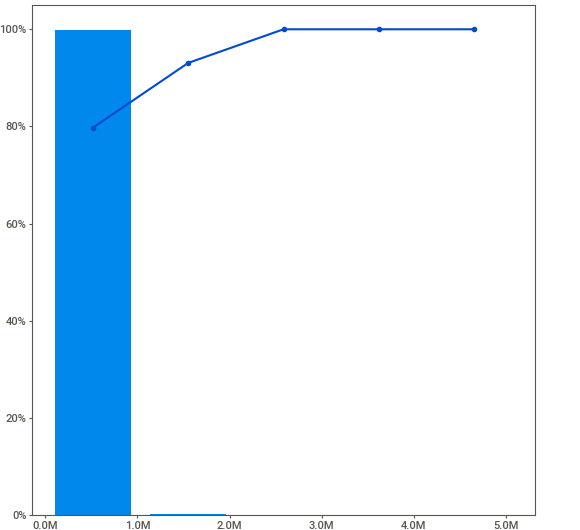
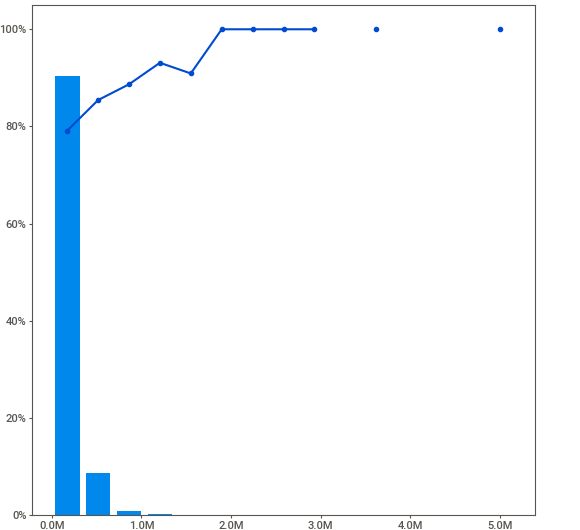
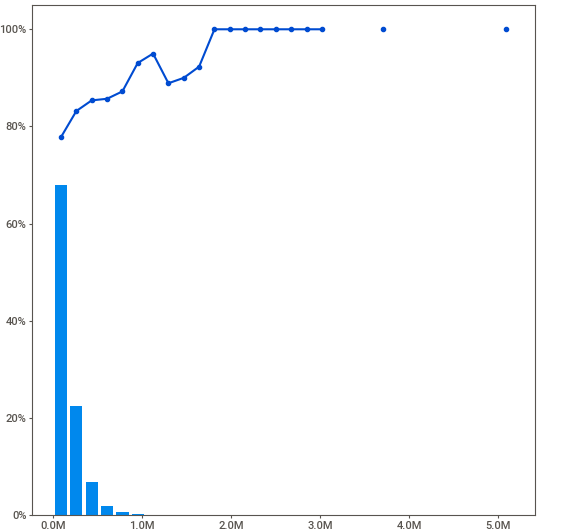
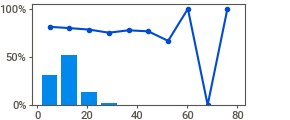
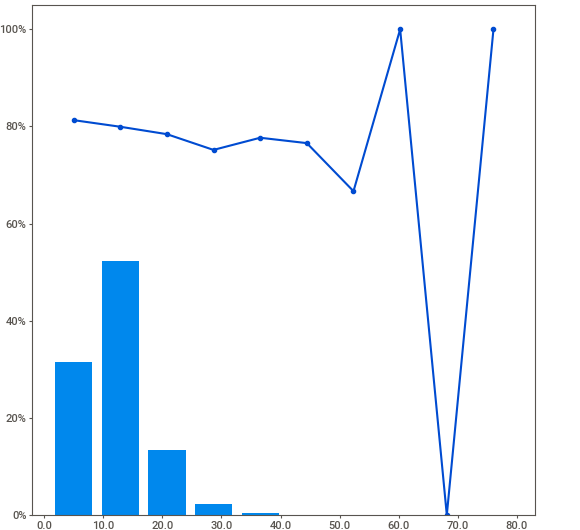
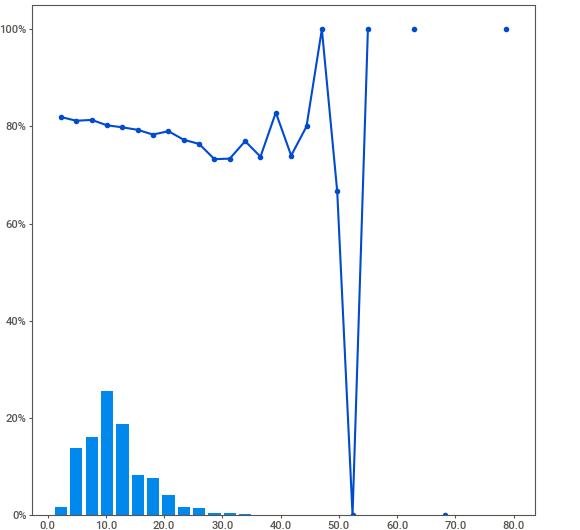
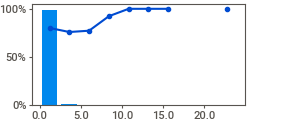
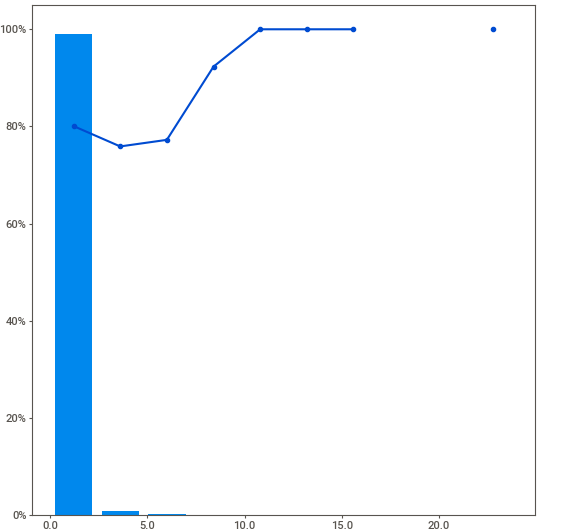
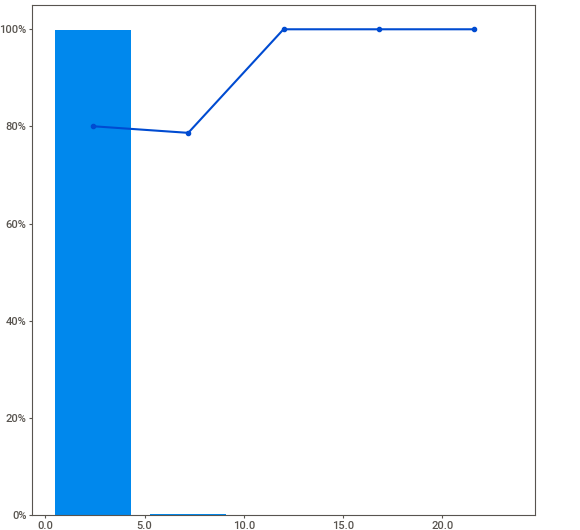
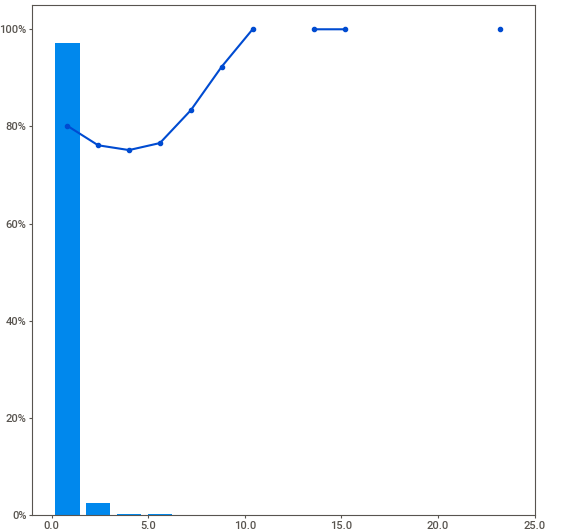
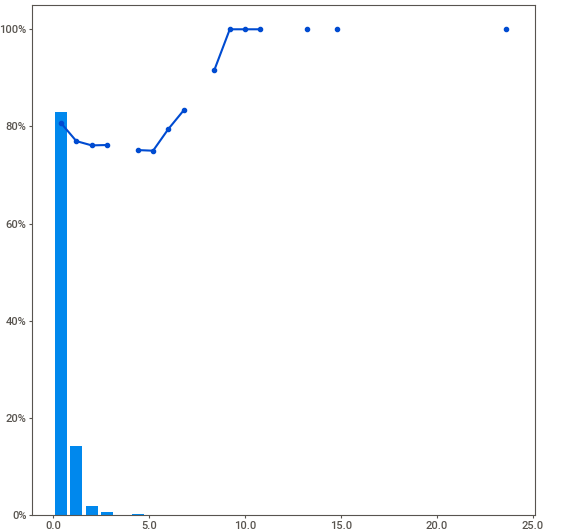
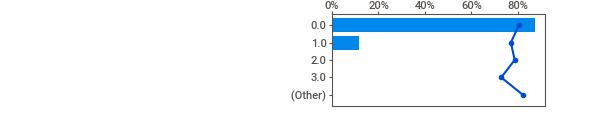
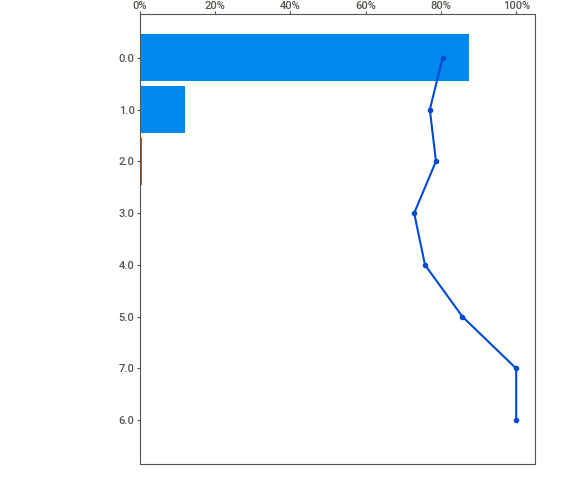
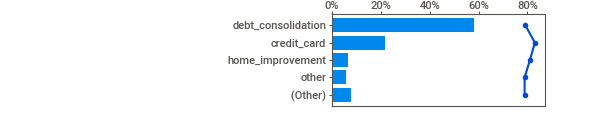
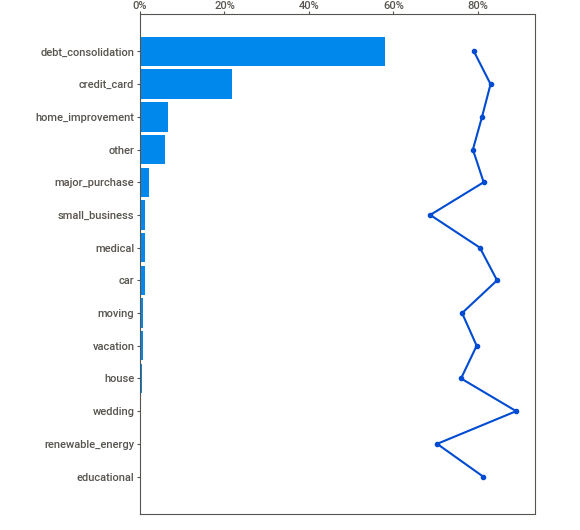
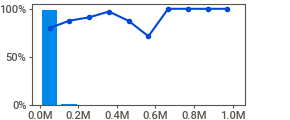
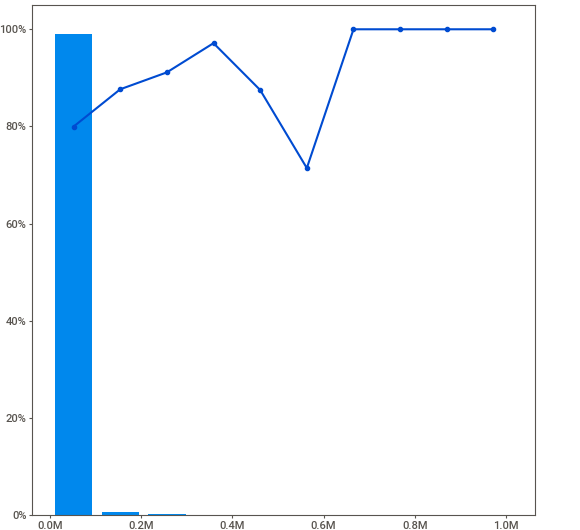
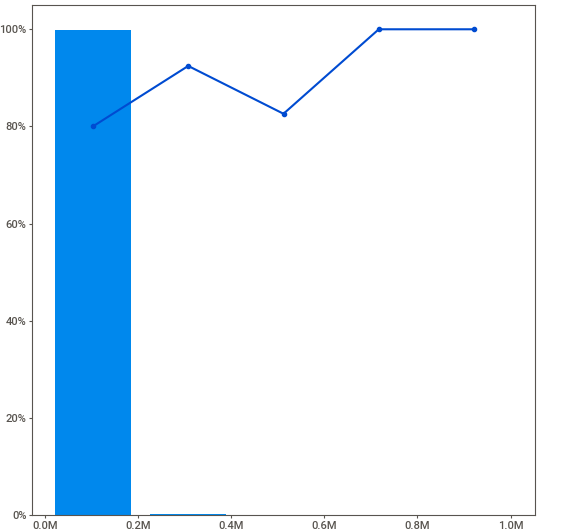
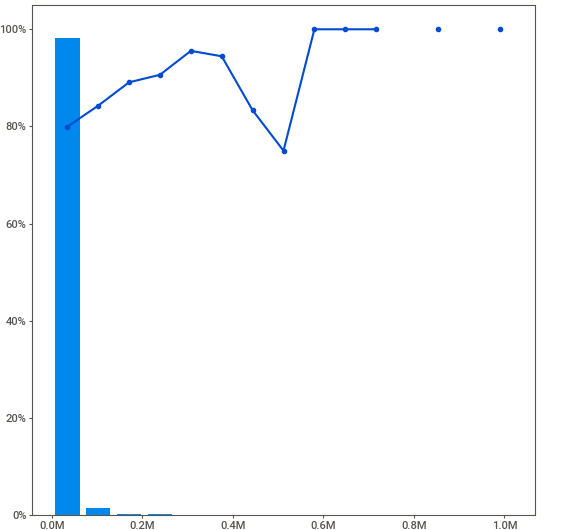
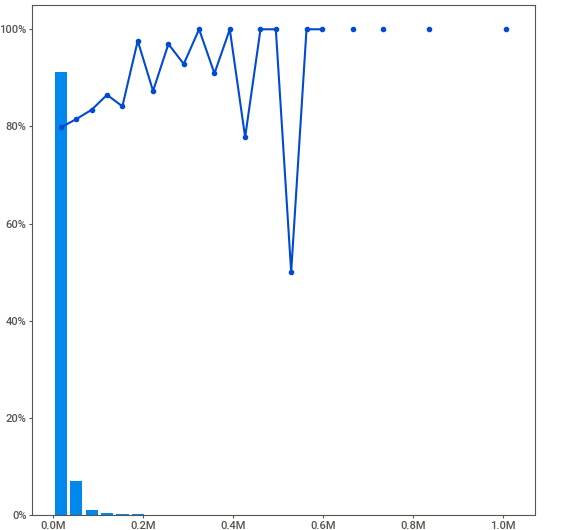
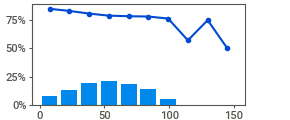
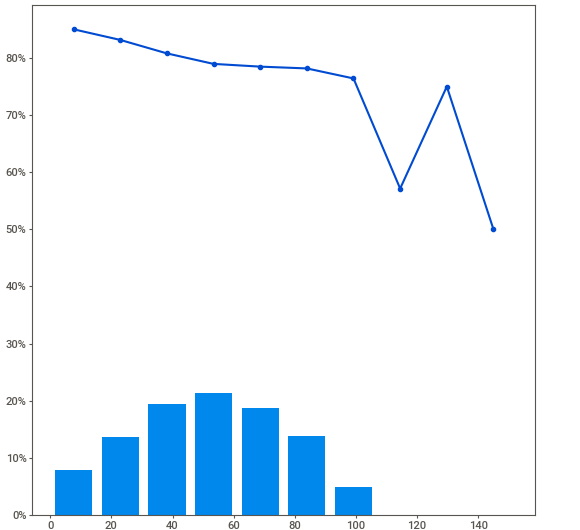
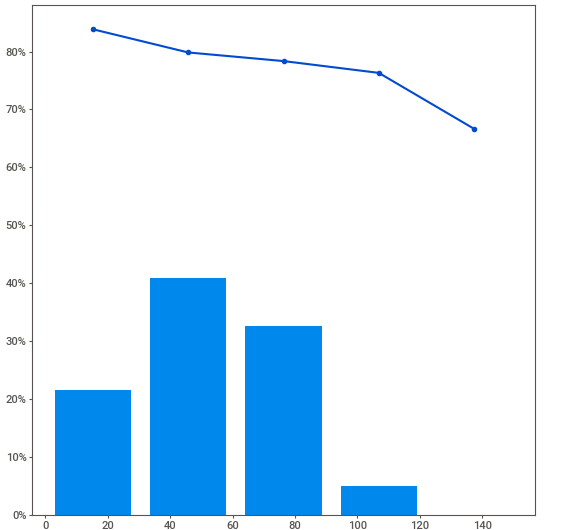
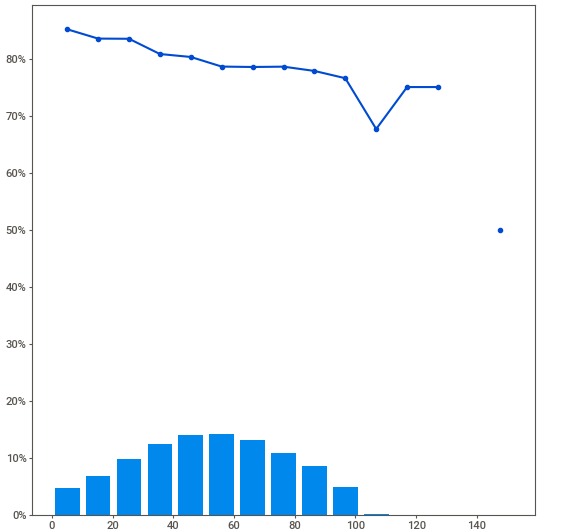
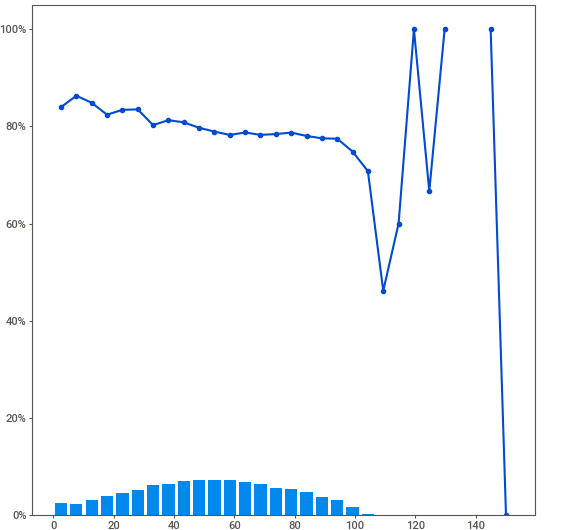
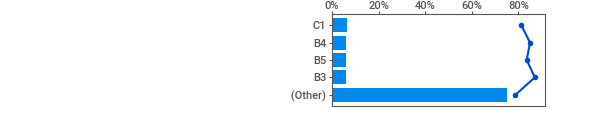
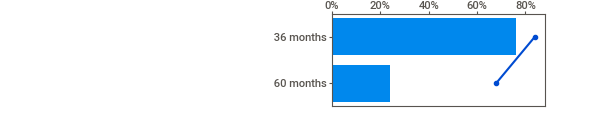
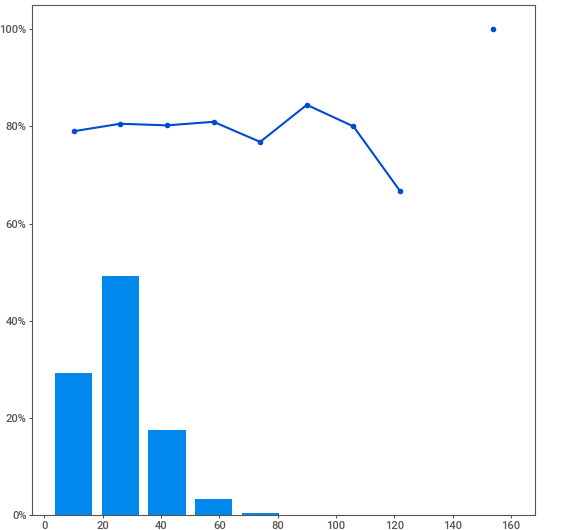
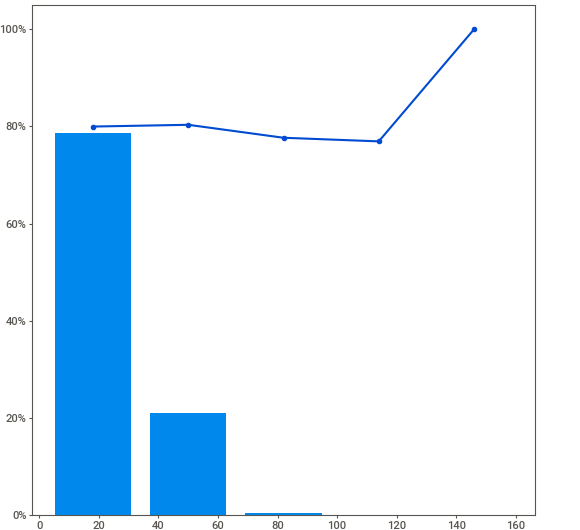
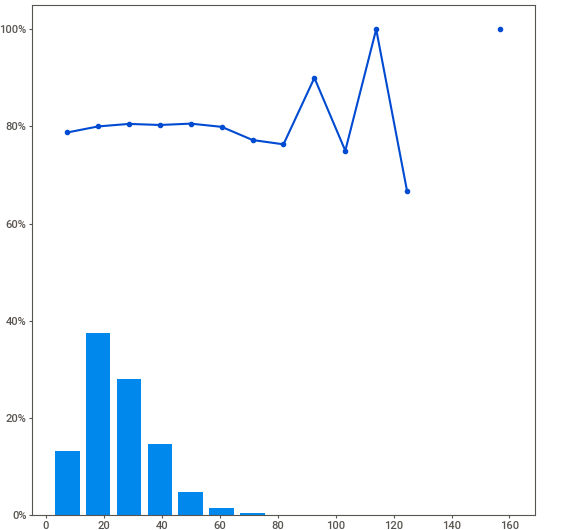
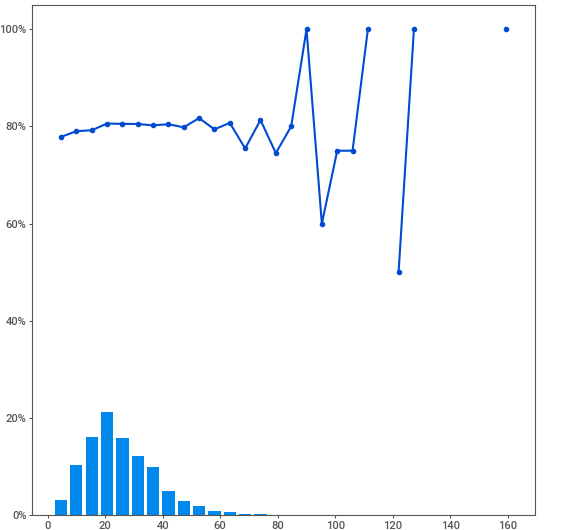
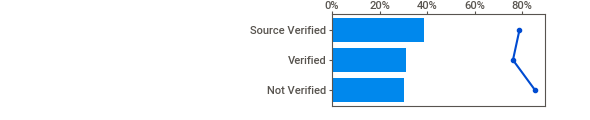
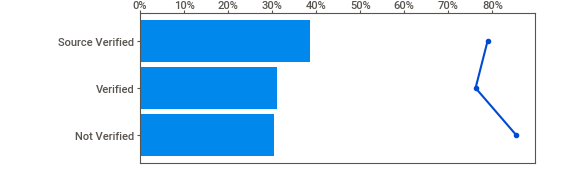
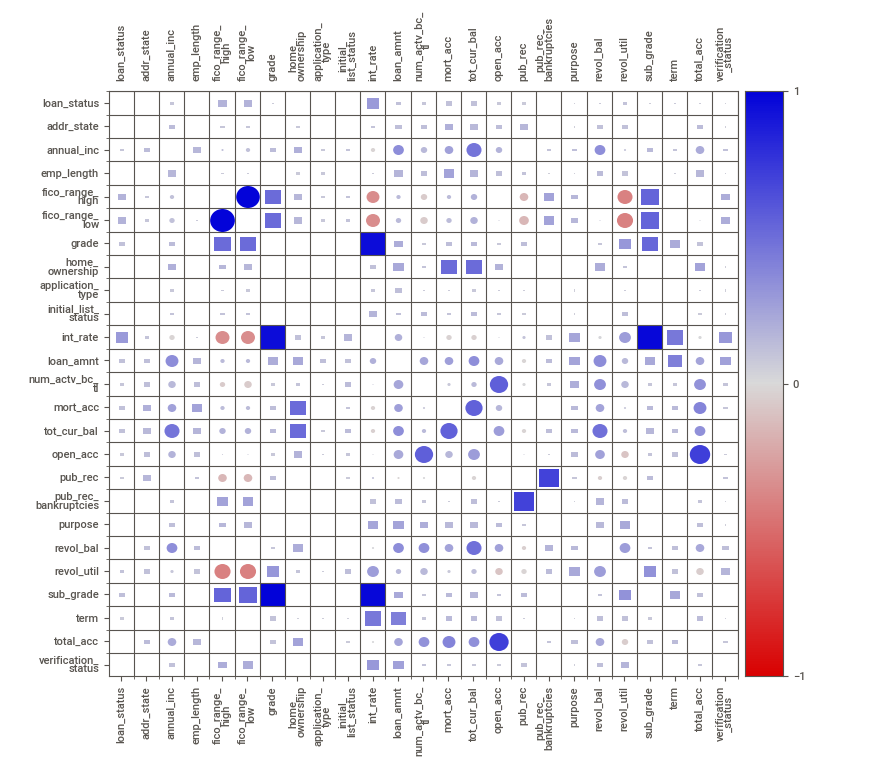
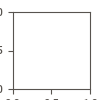

In [ ]:
import sweetviz as sv
report = sv.analyze(df1, target_feat='loan_status')
report.show_notebook()

# Ananlysis Numerical columns

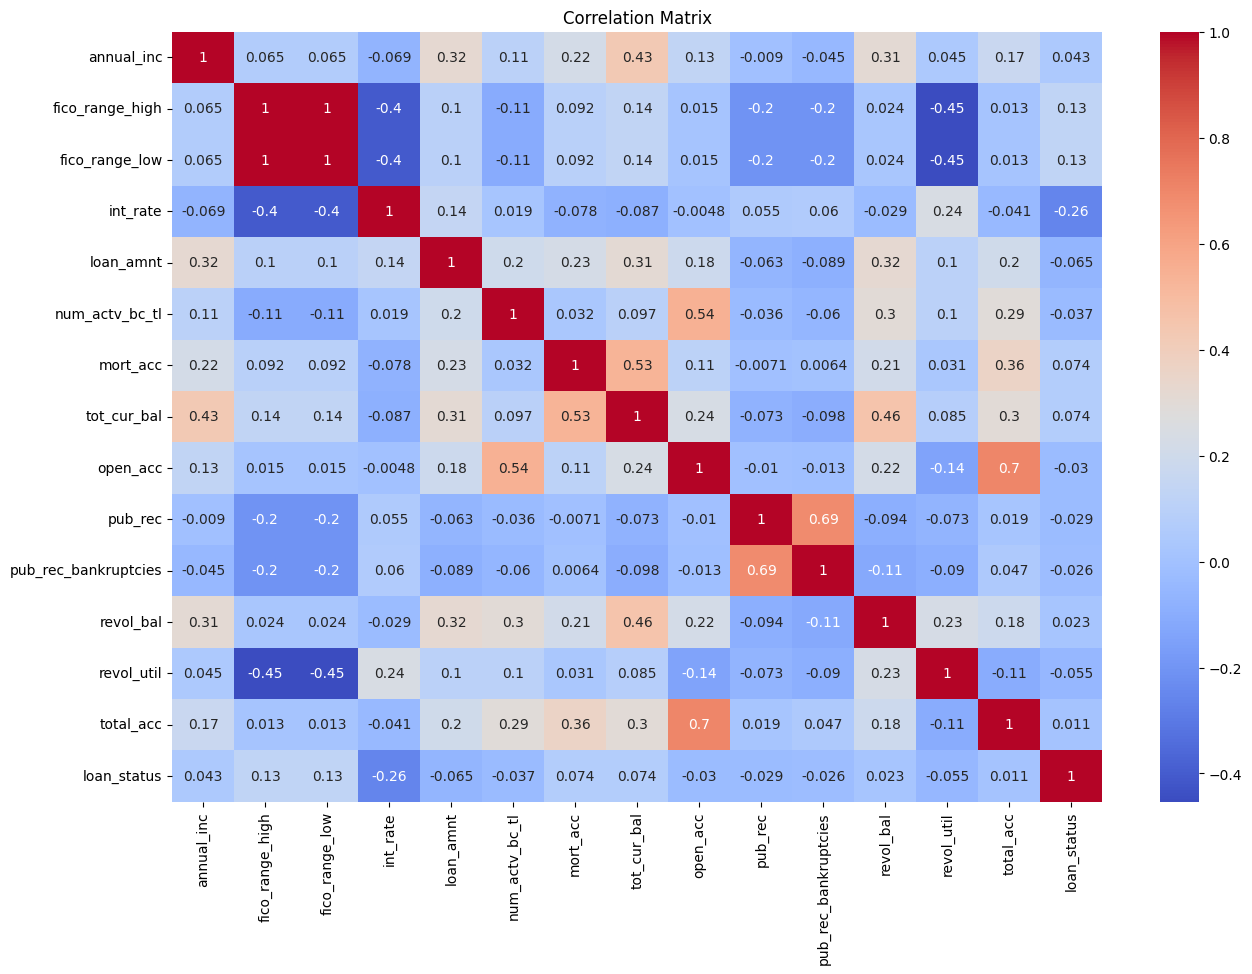

In [14]:
#correlation
# Calculate the correlation matrix for numerical columns
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns
correlations = df1[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [15]:
df['loan_status'].value_counts()

loan_status
Paid         64030
Defaulted    15970
Name: count, dtype: int64

### Analysing the data by the help of **pviot table** so we creat a function table which is help to build the tabble to find the some relationship

In [16]:
  # Creating the pivot table with count by the help of the function
def table(column):
    # Creating the pivot table with count
    pivot_table = pd.pivot_table(df, index=column, columns='loan_status', aggfunc='size', fill_value=0)
    pivot_table['Total'] = pivot_table['Defaulted'] + pivot_table['Paid']
    pivot_table['Default Percentage'] = round((pivot_table['Defaulted'] / pivot_table['Total']) * 100,2)
    # Sorting the pivot table by the default percentage
    pivot_table = pivot_table.sort_values('Default Percentage', ascending=False)

    return pivot_table

## Define a function for creating the **box** plot


In [17]:
# creating a function for creating the box plot
def plot_boxplot(column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column} by loan_status')

## Befine a function here for ploting the **histogram**

In [18]:
def plot_histogram(column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue='loan_status')
    plt.title(f'Histogram of {column} by loan_status')

## Define the function  for **Count plot** for creating the plot

In [19]:
def plot_countplot(column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='loan_status')
    plt.title(f'Countplot of {column} by loan_status')

## creating the hist plot

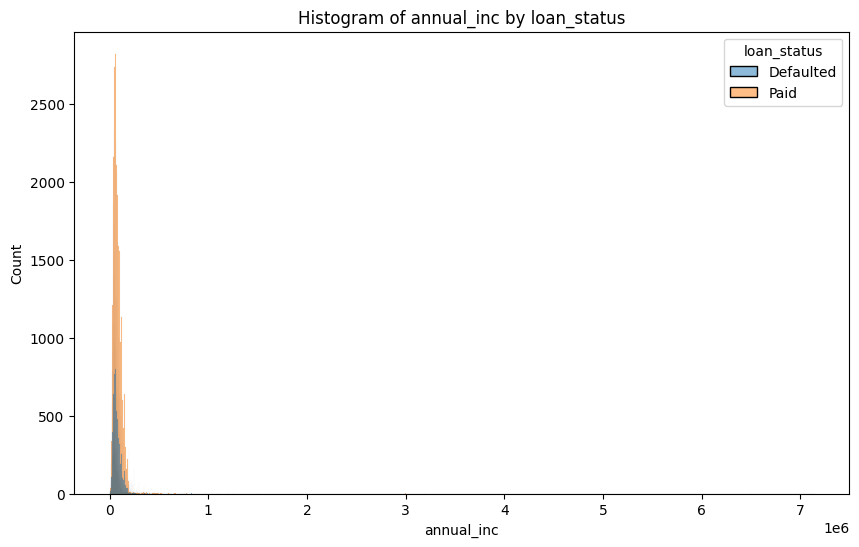

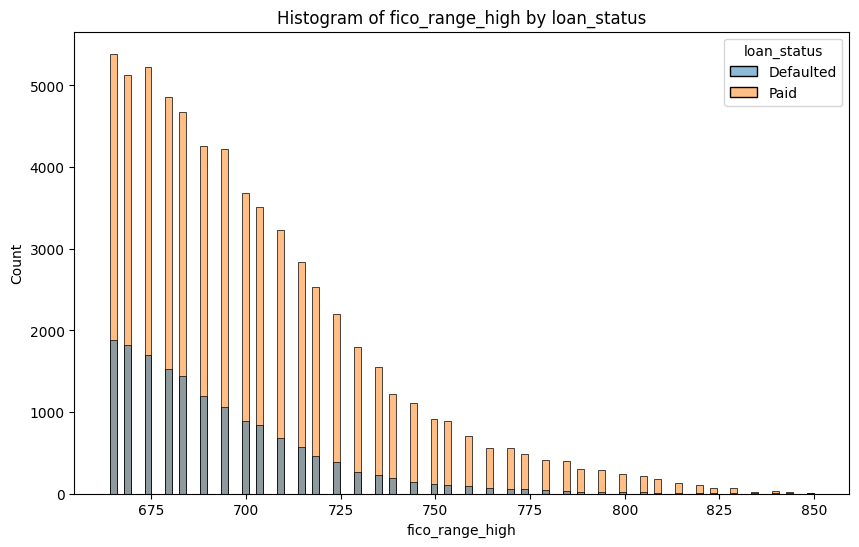

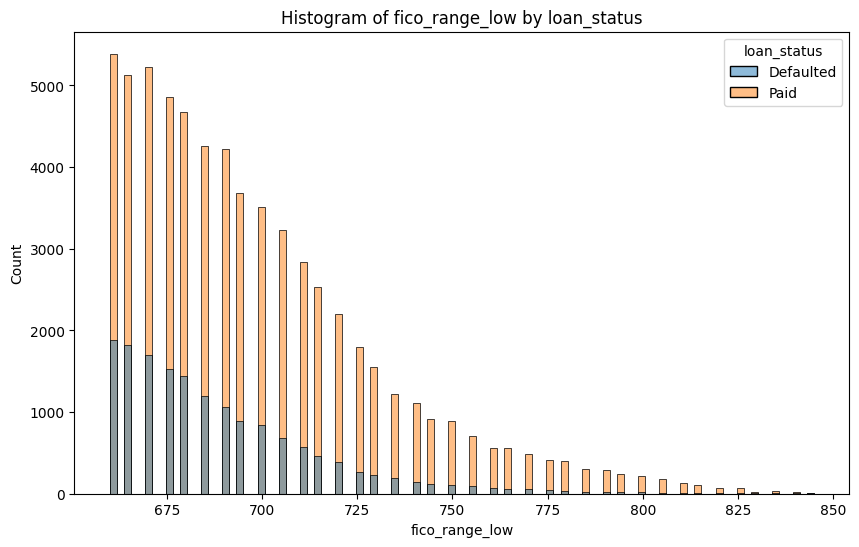

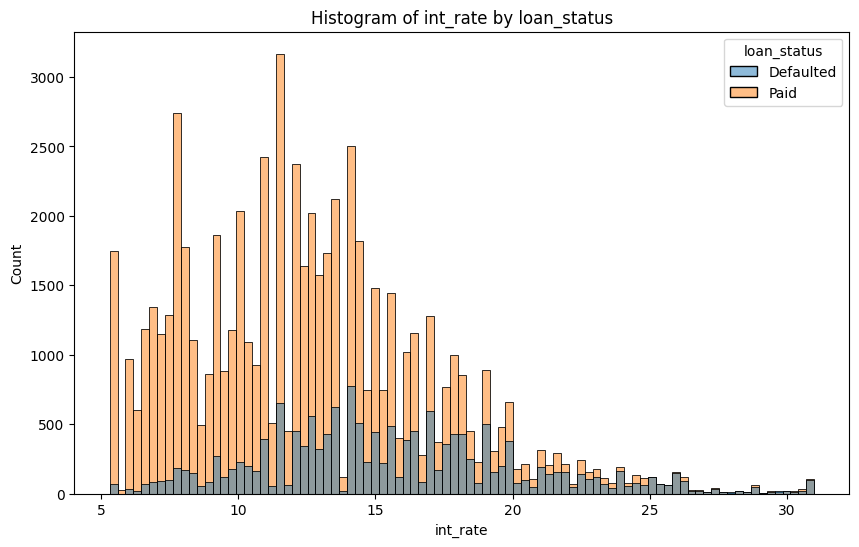

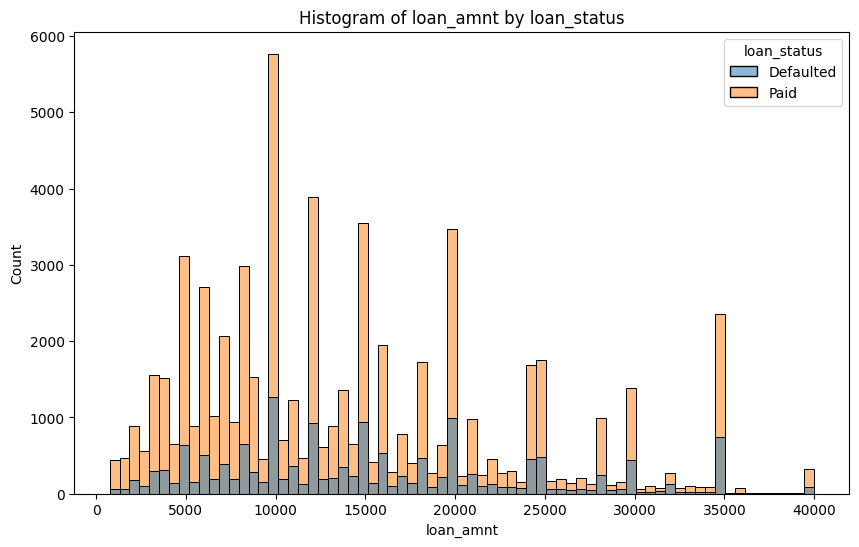

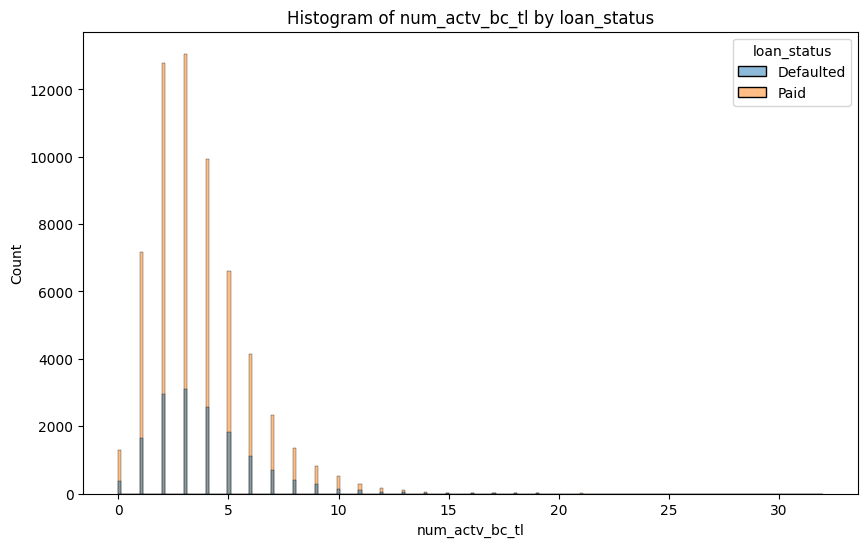

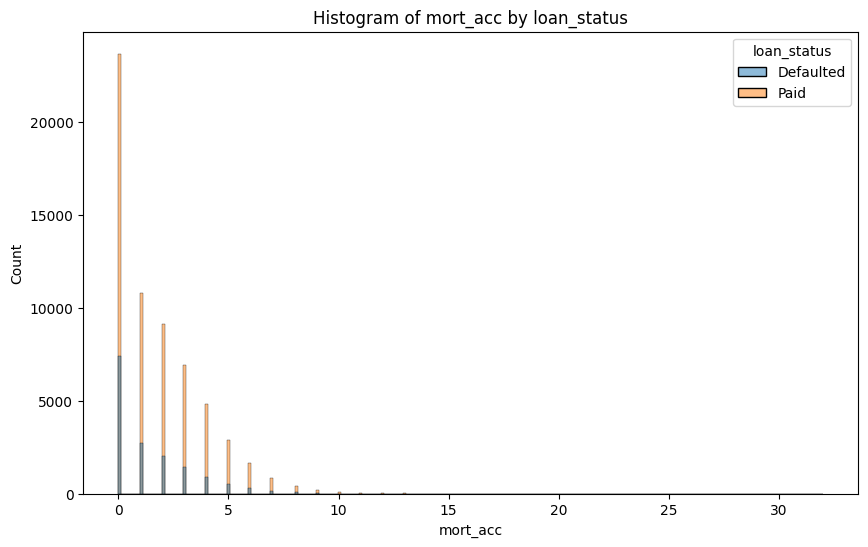

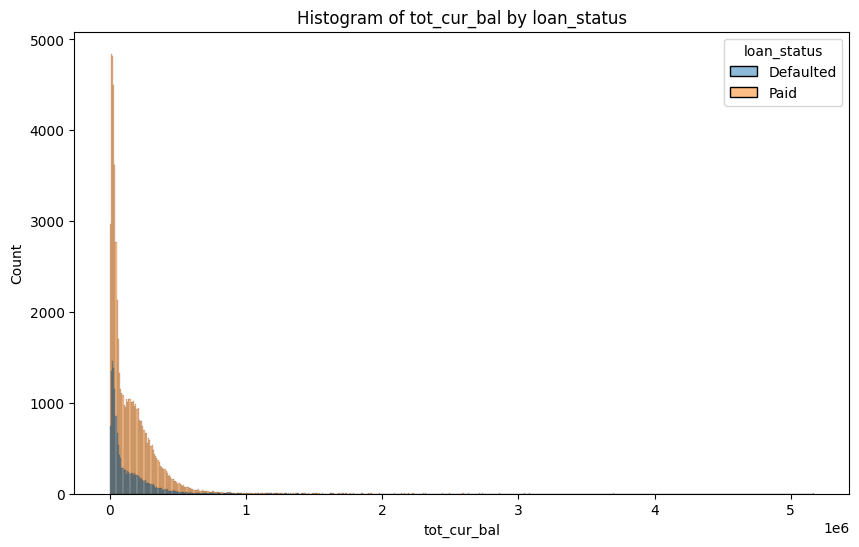

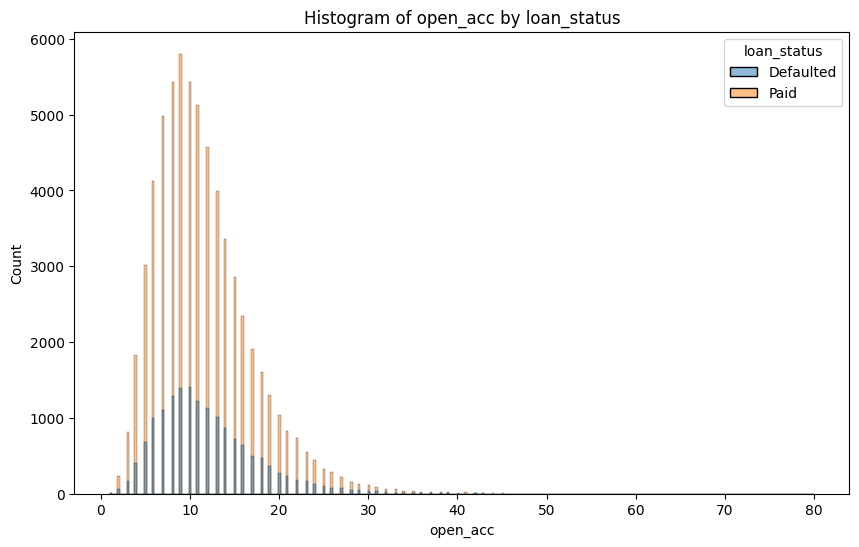

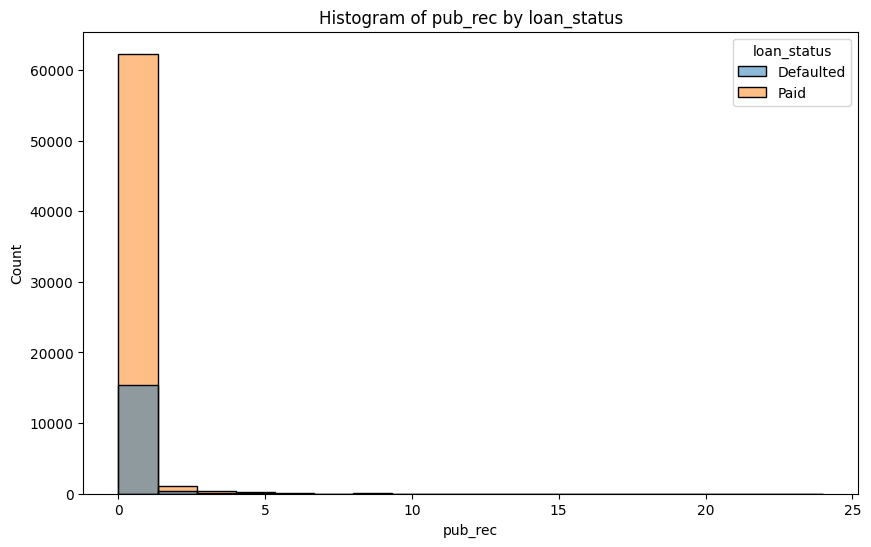

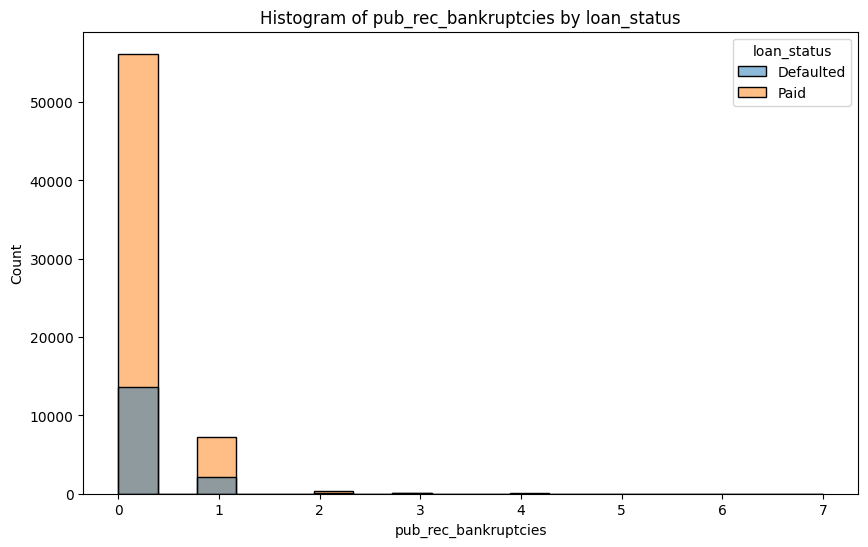

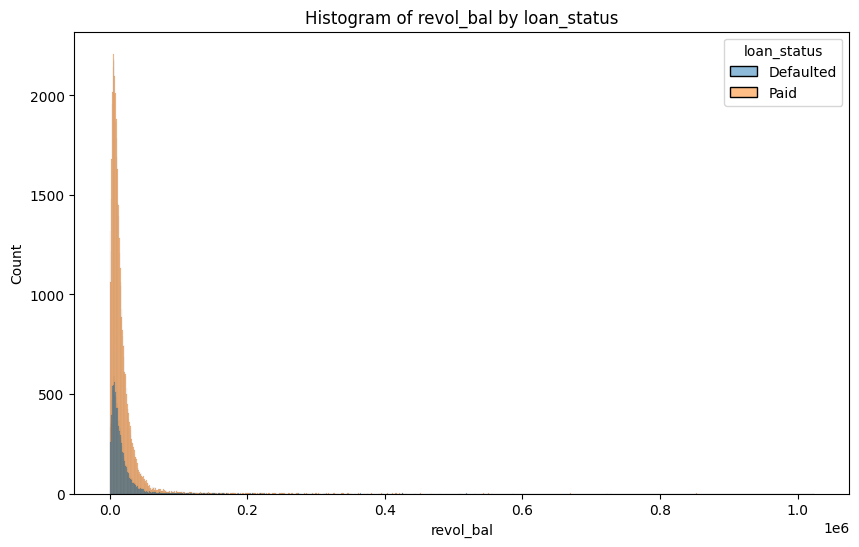

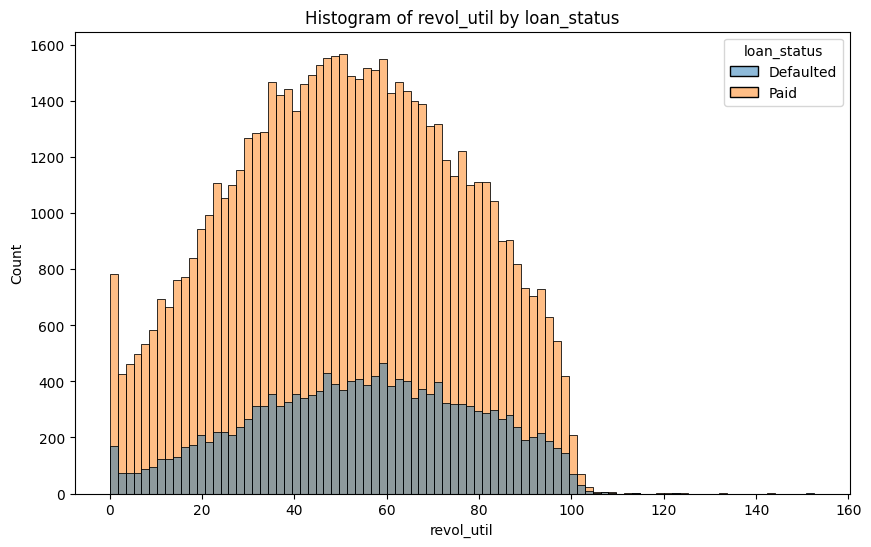

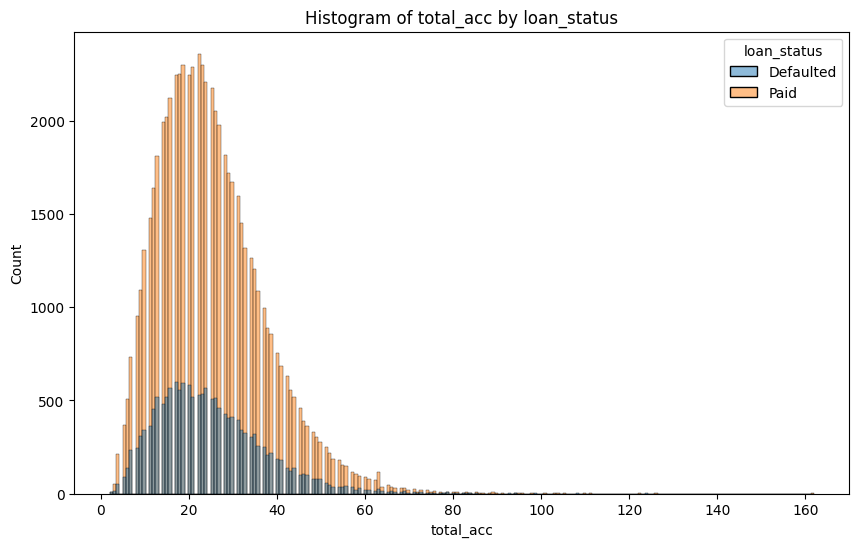

In [ ]:
# Plot histograms for each numerical column with hue='loan_status'
for column in numerical_columns:
    plot_histogram(column)

In [20]:
numerical_columns

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc', 'loan_status'],
      dtype='object')

In [21]:
categorical_columns

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

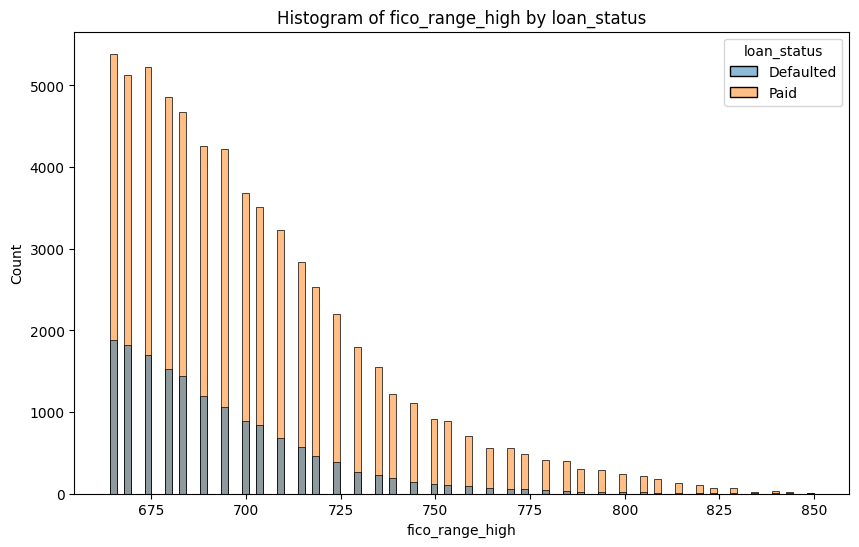

In [22]:
plot_histogram('fico_range_high')

The both graph oof the fico_rang low and fico rang high showing the same relation so we can drop the any one from the datset for more understanding we can check the correlation into the both is mostly same it does not show any impact on the output of the target variable ,
**Autocorelation** this two columns showing the very high correlatin with each other so we drop any one befor model traing

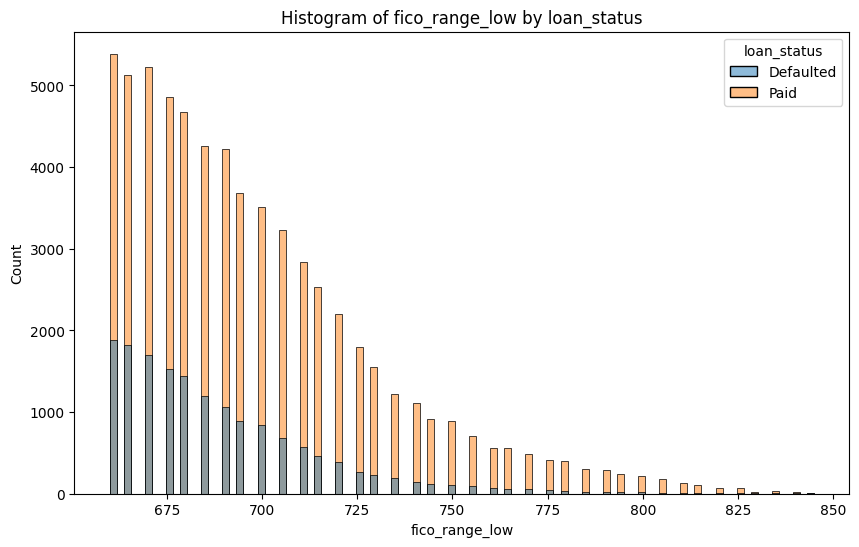

In [23]:
plot_histogram('fico_range_low')

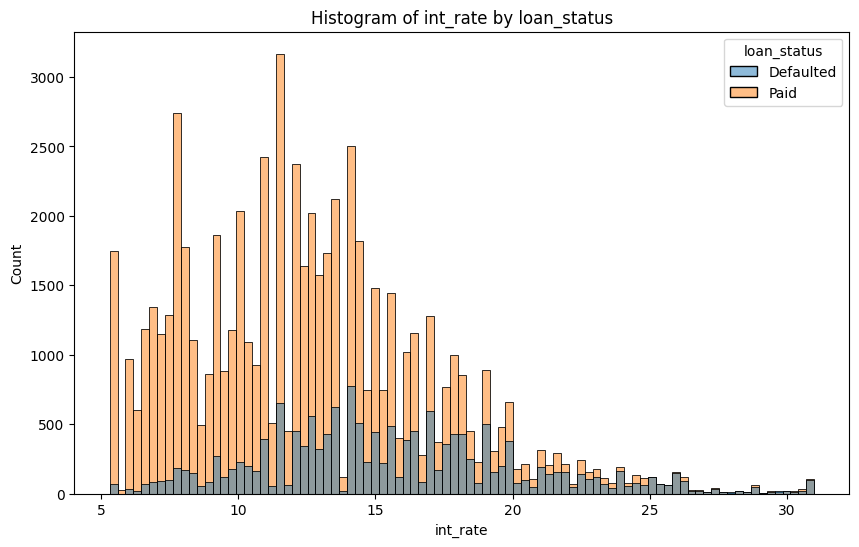

In [24]:
plot_histogram('int_rate')

This grap showing the Good relationship between target veriable if int_rate values is increase the number of defauler is increas

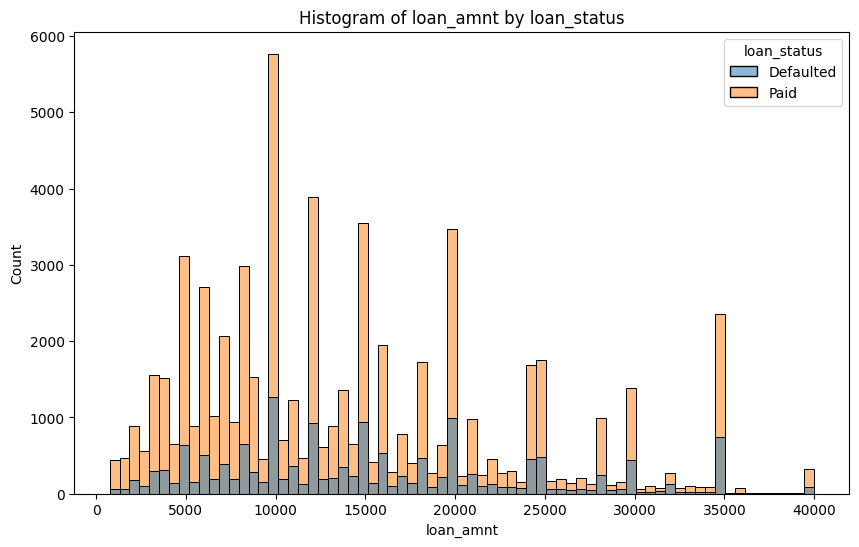

In [25]:
plot_histogram('loan_amnt')

Text(0.5, 1.0, 'Countplot of open_acc by loan_status')

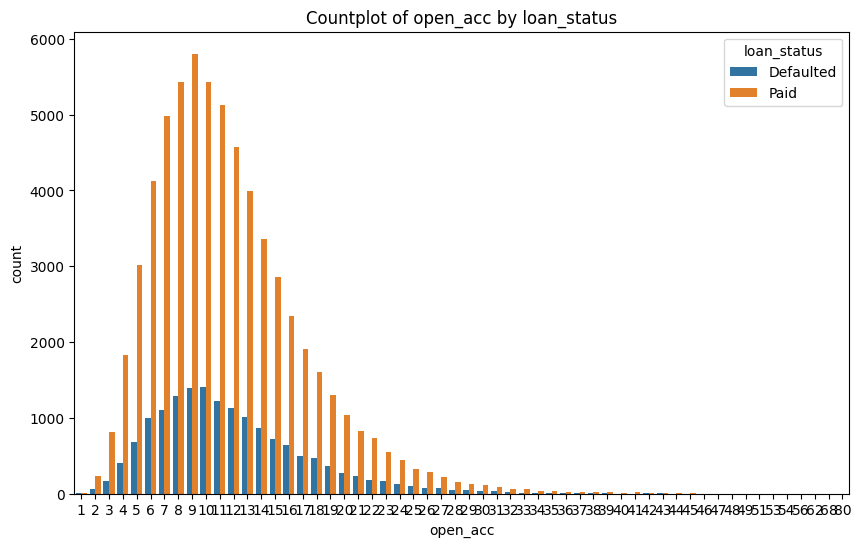

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='open_acc', hue='loan_status')
plt.title('Countplot of open_acc by loan_status')

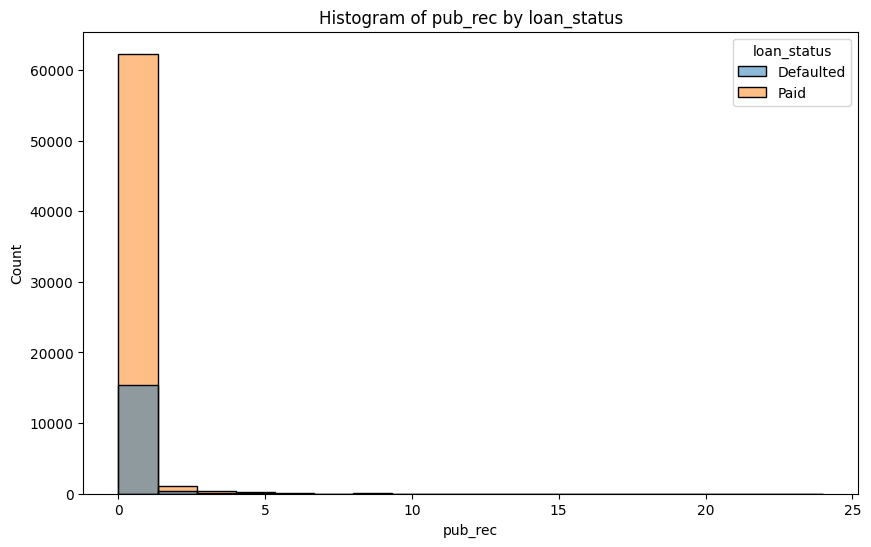

In [27]:
plot_histogram('pub_rec')

In [ ]:
table('pub_rec')

loan_status  Defaulted   Paid  Total  Default Percentage
pub_rec                                                 
5                   18     54     72               25.00
4                   47    142    189               24.87
2                  337   1073   1410               23.90
3                  117    374    491               23.83
1                 2624   8773  11397               23.02
6                    8     31     39               20.51
0                12816  53553  66369               19.31
7                    2     10     12               16.67
8                    1     11     12                8.33
9                    0      1      1                0.00
10                   0      2      2                0.00
11                   0      3      3                0.00
13                   0      1      1                0.00
15                   0      1      1                0.00
24                   0      1      1                0.00

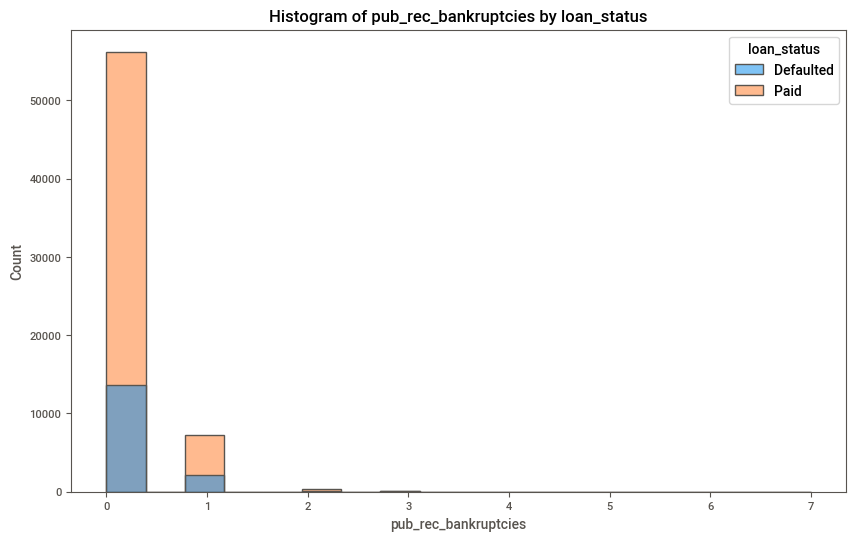

In [ ]:
plot_histogram('pub_rec_bankruptcies')

In [28]:
table('pub_rec_bankruptcies')

loan_status           Defaulted   Paid  Total  Default Percentage
pub_rec_bankruptcies                                             
3.0                          32     86    118               27.12
4.0                           8     25     33               24.24
1.0                        2173   7291   9464               22.96
2.0                         103    380    483               21.33
0.0                       13649  56213  69862               19.54
5.0                           1      6      7               14.29
6.0                           0      1      1                0.00
7.0                           0      1      1                0.00

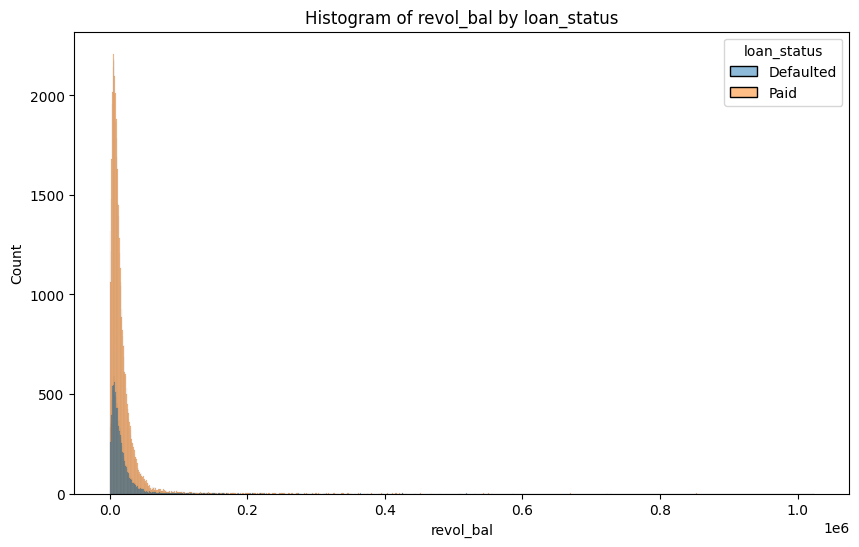

In [29]:
plot_histogram('revol_bal')

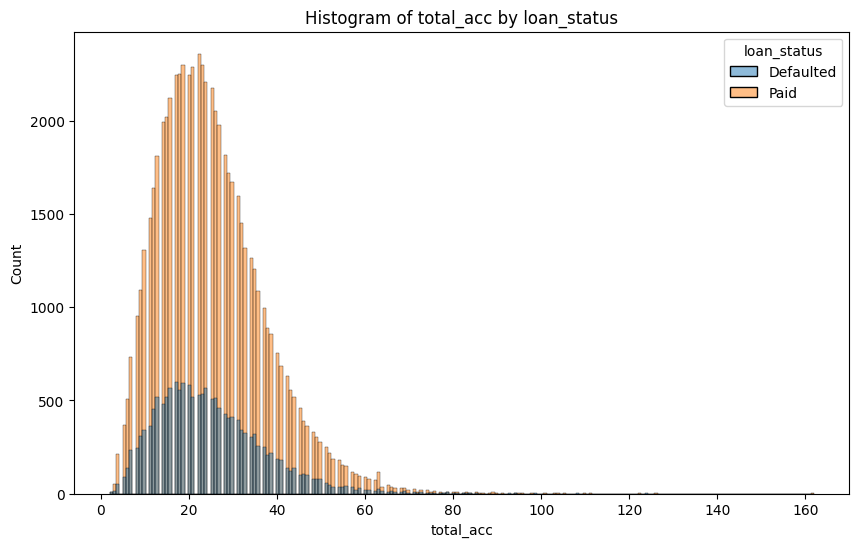

In [30]:
plot_histogram('total_acc')

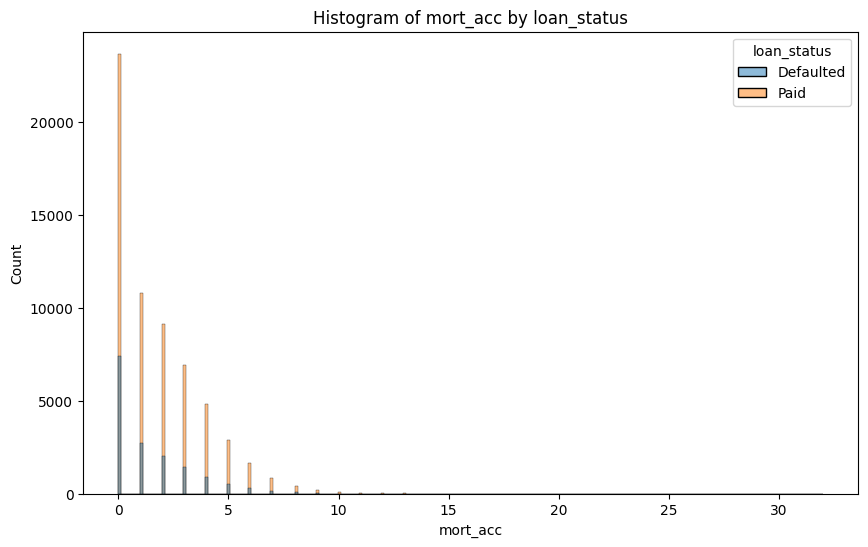

In [31]:
plot_histogram('mort_acc')

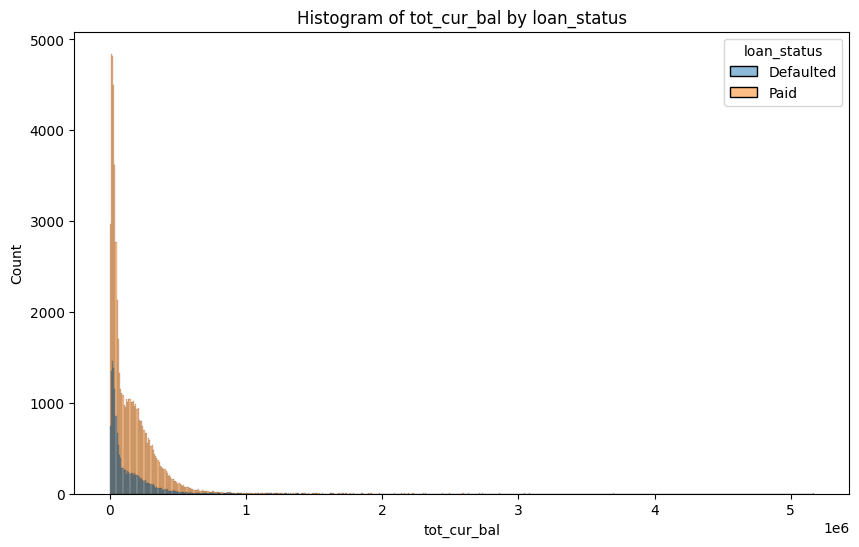

In [32]:
plot_histogram('tot_cur_bal')

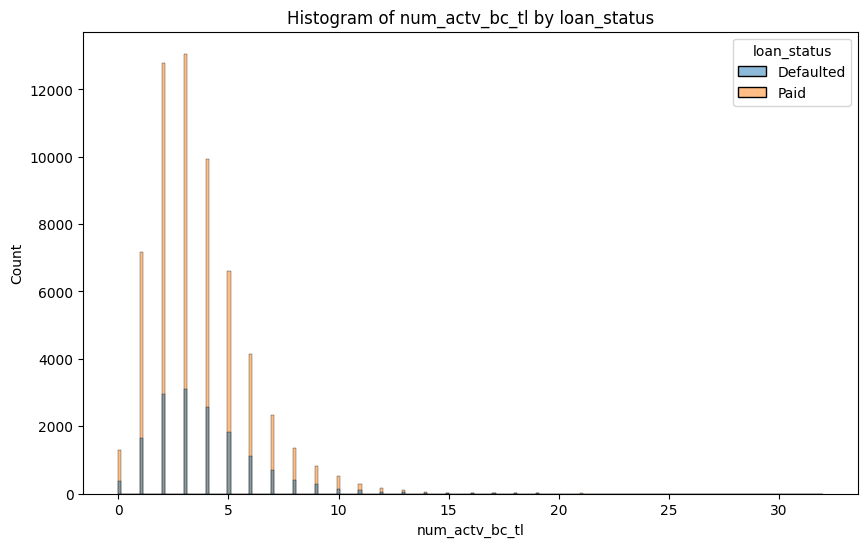

In [33]:
plot_histogram('num_actv_bc_tl')

In [34]:
table('num_actv_bc_tl')

loan_status     Defaulted   Paid  Total  Default Percentage
num_actv_bc_tl                                             
27.0                    1      0      1              100.00
20.0                    2      1      3               66.67
22.0                    2      2      4               50.00
15.0                   16     30     46               34.78
26.0                    1      2      3               33.33
21.0                    2      4      6               33.33
19.0                    3      6      9               33.33
13.0                   43    100    143               30.07
18.0                    4     10     14               28.57
11.0                  103    283    386               26.68
12.0                   58    161    219               26.48
9.0                   276    809   1085               25.44
17.0                    6     18     24               25.00
8.0                   414   1348   1762               23.50
14.0                   18     59     77               23.38
7.0                   700   2332   3032               23.09
10.0                  150    515    665               22.56
0.0                   372   1290   1662               22.38
5.0                  1815   6611   8426               21.54
6.0                  1112   4134   5246               21.20
4.0                  2560   9923  12483               20.51
16.0                    6     25     31               19.35
3.0                  3116  13060  16176               19.26
2.0                  2954  12768  15722               18.79
1.0                  1644   7180   8824               18.63
24.0                    0      1      1                0.00
25.0                    0      1      1                0.00
32.0                    0      1      1                0.00

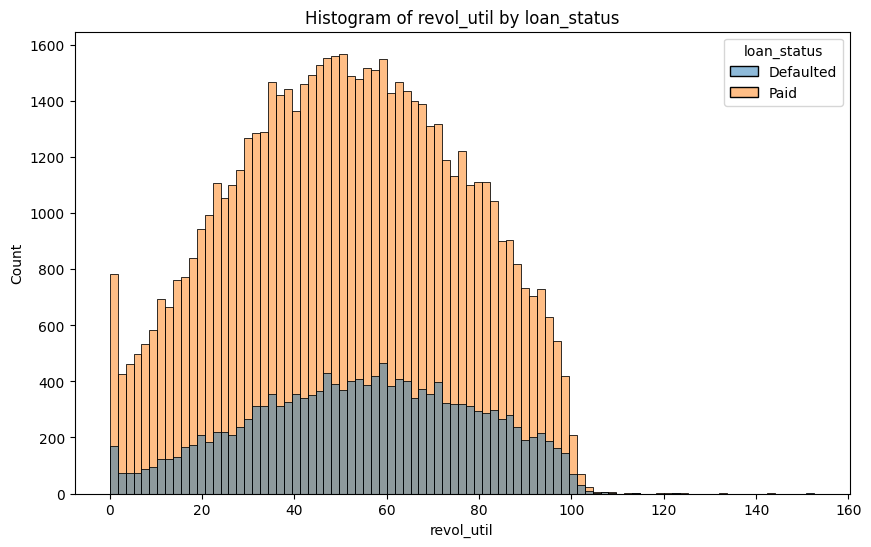

In [35]:
plot_histogram('revol_util')

In [36]:
numerical_columns

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc', 'loan_status'],
      dtype='object')

In [37]:
len(numerical_columns)

15

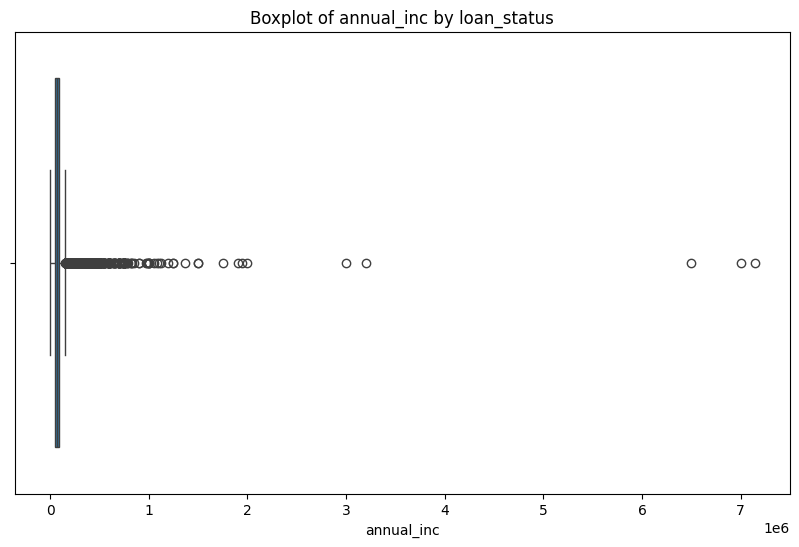

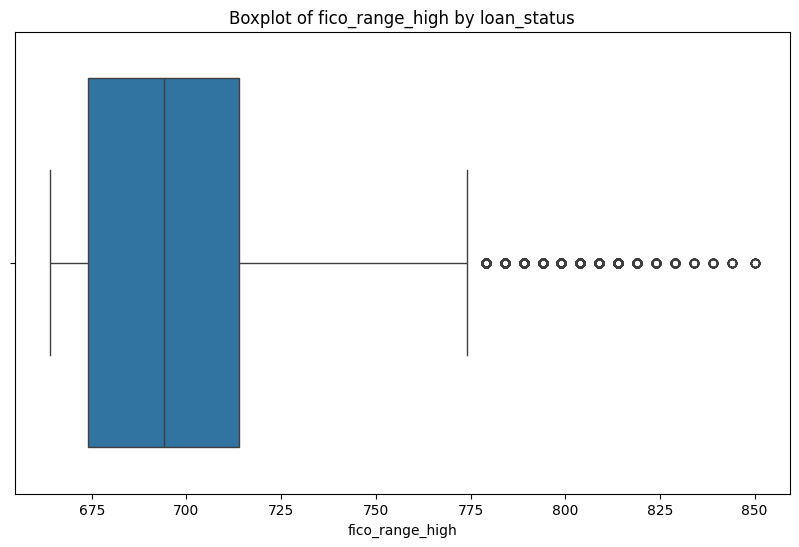

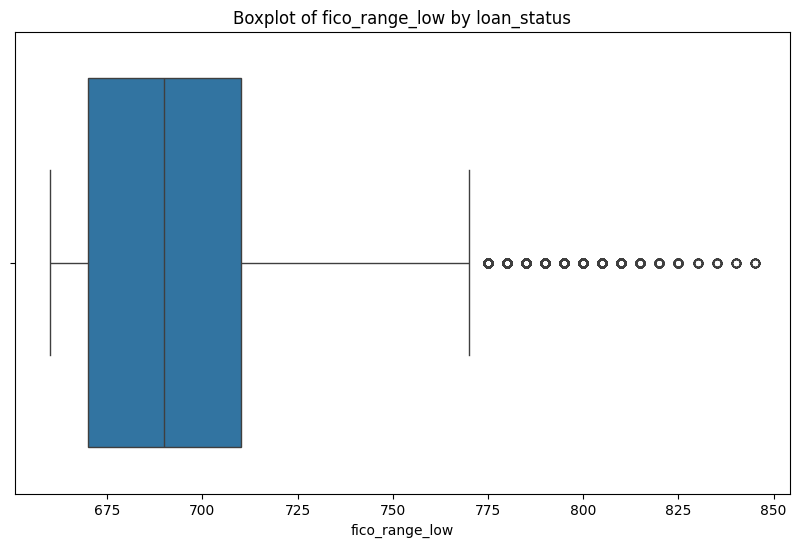

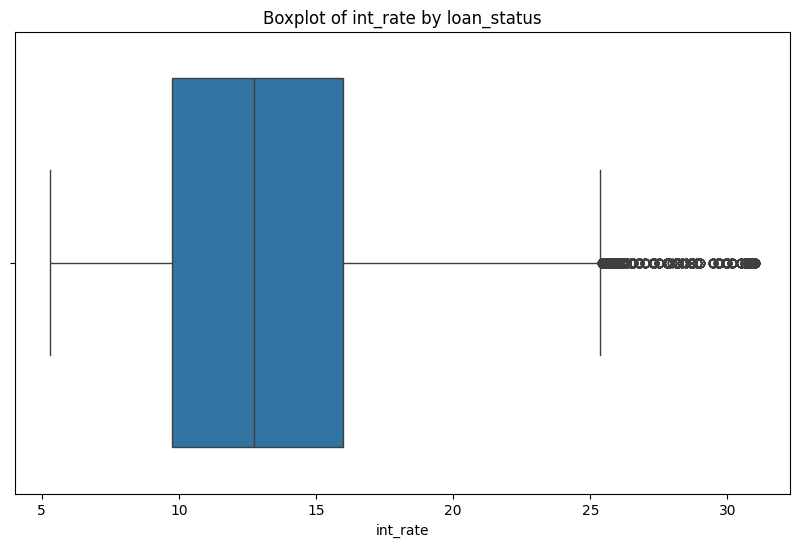

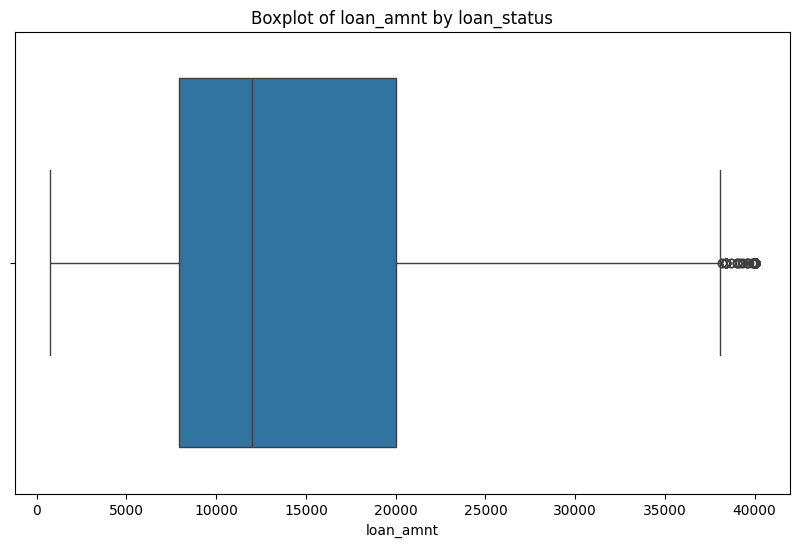

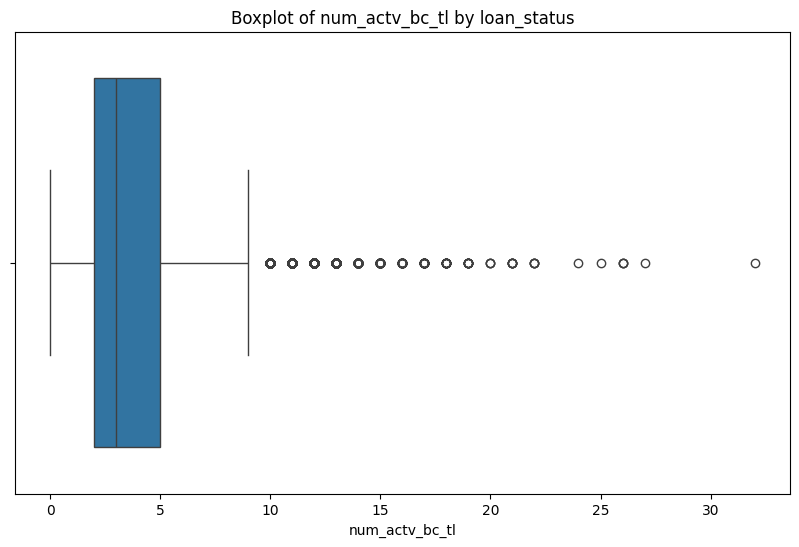

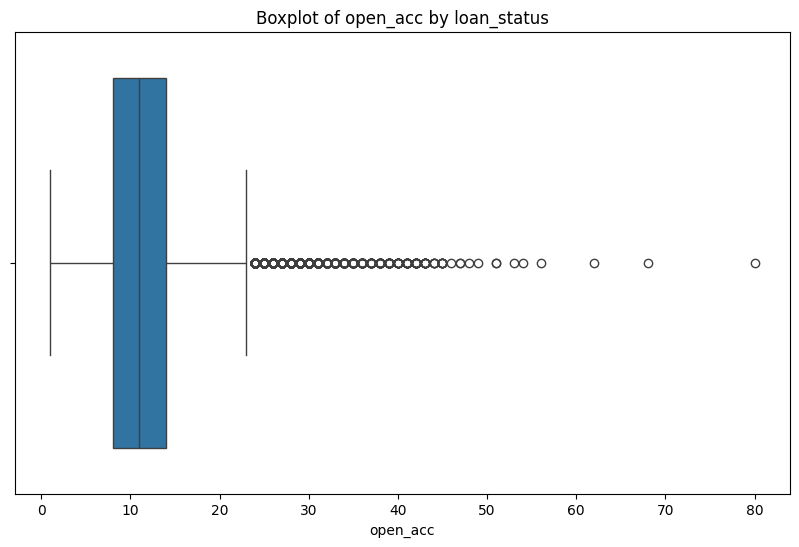

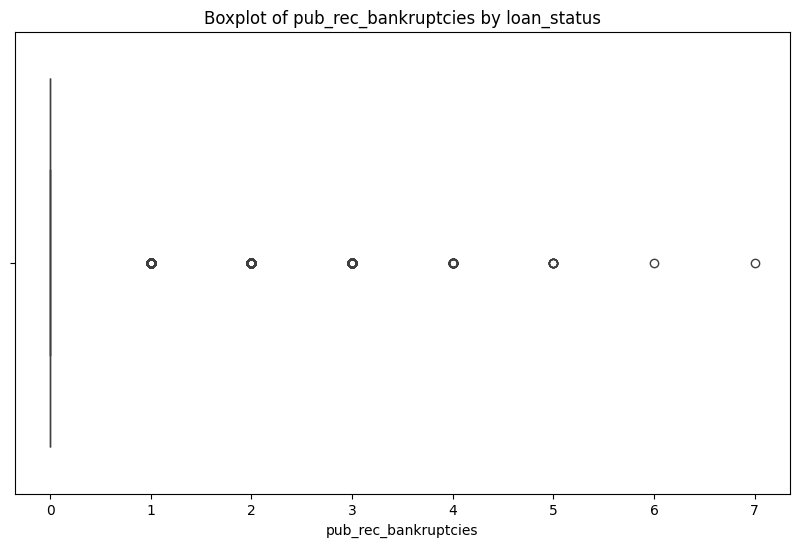

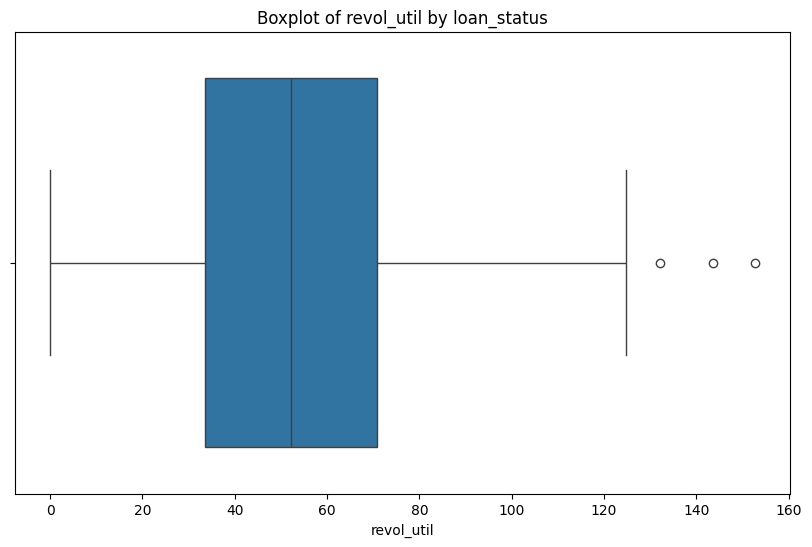

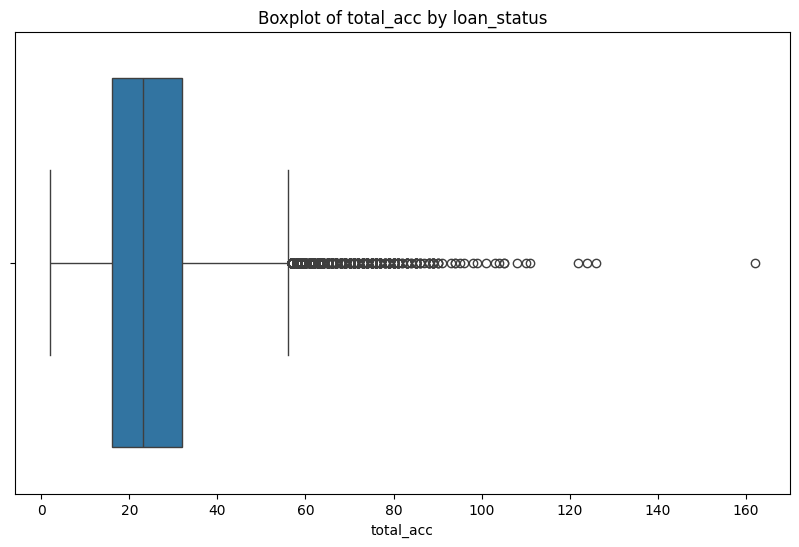

In [38]:
# creating the box plot
for column in numerical_columns:
    plot_boxplot(column)

All the features affected by outliers in this dataset we can look at the above graph and understand the distribution

# analysis the some categorical data

In [39]:
table('term')

loan_status  Defaulted   Paid  Total  Default Percentage
term                                                    
60 months         6183  13067  19250               32.12
36 months         9787  50963  60750               16.11

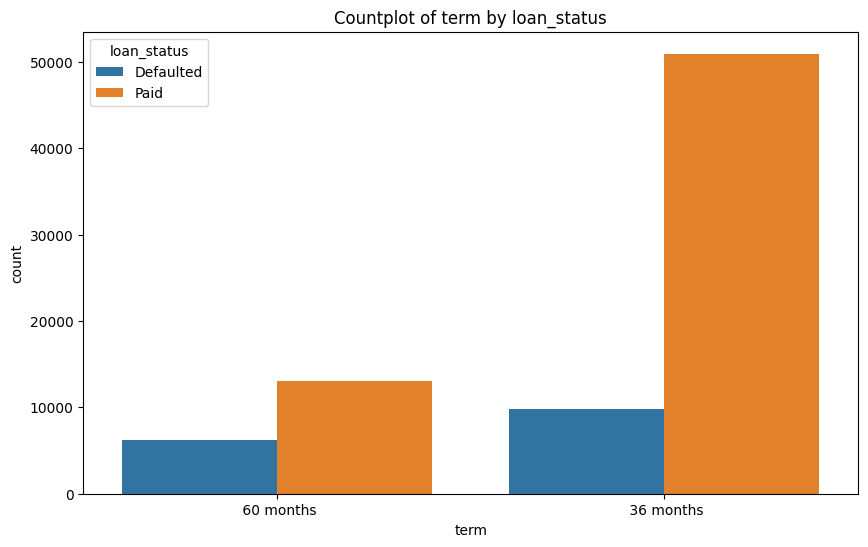

In [40]:
plot_countplot("term")

In this plot the loan tenure is increased, loan defaults will increase

In [41]:
table('emp_length')

loan_status  Defaulted   Paid  Total  Default Percentage
emp_length                                              
7 years            748   2849   3597               20.80
9 years            606   2416   3022               20.05
2 years           1467   5852   7319               20.04
8 years            715   2868   3583               19.96
4 years            948   3815   4763               19.90
< 1 year          1251   5046   6297               19.87
1 year            1050   4244   5294               19.83
5 years            999   4095   5094               19.61
6 years            722   2969   3691               19.56
3 years           1262   5212   6474               19.49
10+ years         4963  21315  26278               18.89

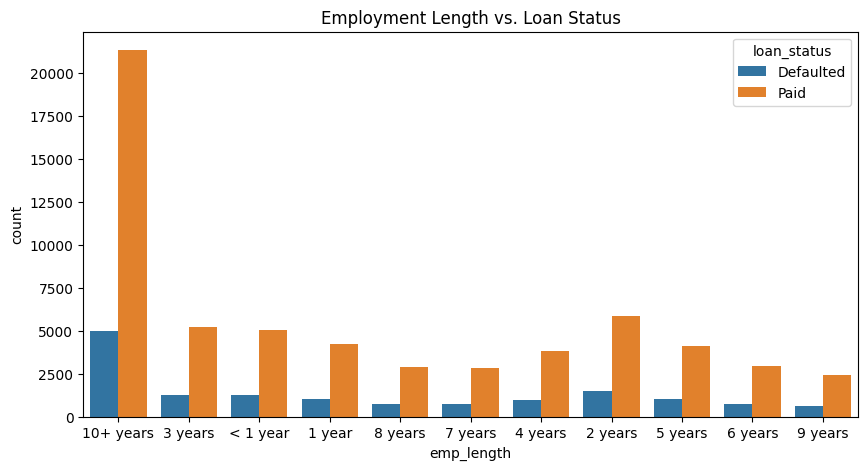

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(x='emp_length', hue='loan_status', data=df)
plt.title('Employment Length vs. Loan Status')
plt.show()


In this graph we can see if you have long working experience then you should take loan than other which increases the number of defaulter but it does not provide good information about defaulter and paid customer.

In [43]:
table('home_ownership')

loan_status     Defaulted   Paid  Total  Default Percentage
home_ownership                                             
OTHER                   4      3      7               57.14
RENT                 7402  24286  31688               23.36
OWN                  1779   6875   8654               20.56
MORTGAGE             6783  32845  39628               17.12
ANY                     2     17     19               10.53
NONE                    0      4      4                0.00

In [44]:
plot_countplot("home_ownership")

In this graph, we can see the increase in number of persons having mortgage, rent and own house but the number of defaulters among rented persons is more than others.

In [45]:
table('purpose')

loan_status         Defaulted   Paid  Total  Default Percentage
purpose                                                        
small_business            297    653    950               31.26
renewable_energy           16     38     54               29.63
house                      99    314    413               23.97
moving                    130    418    548               23.72
other                     991   3692   4683               21.16
debt_consolidation       9709  36709  46418               20.92
vacation                  105    413    518               20.27
medical                   176    726    902               19.51
home_improvement         1001   4267   5268               19.00
educational                 3     13     16               18.75
major_purchase            325   1421   1746               18.61
credit_card              2972  14534  17506               16.98
car                       134    734    868               15.44
wedding                    12     98    110               10.91

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(y='purpose', hue='loan_status', data=df)
plt.title('Loan Purpose vs. Loan Status')
plt.show()


In [47]:
table('addr_state')

loan_status  Defaulted  Paid  Total  Default Percentage
addr_state                                             
MS                 105   268    373               28.15
NE                  66   174    240               27.50
AL                 246   740    986               24.95
OK                 177   548    725               24.41
LA                 221   707    928               23.81
AR                 140   450    590               23.73
NV                 288   936   1224               23.53
TN                 271   936   1207               22.45
VT                  40   141    181               22.10
FL                1225  4393   5618               21.80
NY                1407  5054   6461               21.78
ID                  23    83    106               21.70
DE                  47   172    219               21.46
MD                 385  1417   1802               21.37
VA                 479  1770   2249               21.30
PA                 569  2107   2676               21.26
MI                 438  1653   2091               20.95
NM                  92   348    440               20.91
NJ                 595  2258   2853               20.86
MO                 268  1030   1298               20.65
KY                 172   664    836               20.57
NC                 468  1823   2291               20.43
IN                 270  1059   1329               20.32
HI                  82   322    404               20.30
OH                 518  2057   2575               20.12
CA                2335  9409  11744               19.88
MN                 274  1140   1414               19.38
WI                 202   841   1043               19.37
AZ                 385  1608   1993               19.32
RI                  67   289    356               18.82
ND                  16    69     85               18.82
GA                 476  2054   2530               18.81
TX                1221  5272   6493               18.80
MA                 345  1517   1862               18.53
IL                 558  2540   3098               18.01
CT                 201   942   1143               17.59
MT                  40   189    229               17.47
SC                 174   833   1007               17.28
NH                  64   309    373               17.16
UT                  90   464    554               16.25
WA                 276  1460   1736               15.90
SD                  30   162    192               15.62
KS                  99   550    649               15.25
CO                 270  1520   1790               15.08
WY                  26   161    187               13.90
WV                  37   231    268               13.81
ME                  15    95    110               13.64
OR                 129   896   1025               12.59
DC                  24   177    201               11.94
AK                  24   191    215               11.16
IA                   0     1      1                0.00

In [48]:
plt.figure(figsize=(15, 10))
sns.countplot(y='addr_state', hue='loan_status', data=df)
plt.title('Address State vs. Loan Status')
plt.show()


In [49]:
table('verification_status')

loan_status          Defaulted   Paid  Total  Default Percentage
verification_status                                             
Verified                  5923  18953  24876               23.81
Source Verified           6506  24349  30855               21.09
Not Verified              3541  20728  24269               14.59

In [50]:
plot_countplot("verification_status")

In [51]:
table('initial_list_status')

loan_status          Defaulted   Paid  Total  Default Percentage
initial_list_status                                             
w                         9472  37273  46745               20.26
f                         6498  26757  33255               19.54

In [52]:
plot_countplot("initial_list_status")

In [53]:
table('application_type')

loan_status       Defaulted   Paid  Total  Default Percentage
application_type                                             
Joint App               422   1132   1554               27.16
Individual            15548  62898  78446               19.82

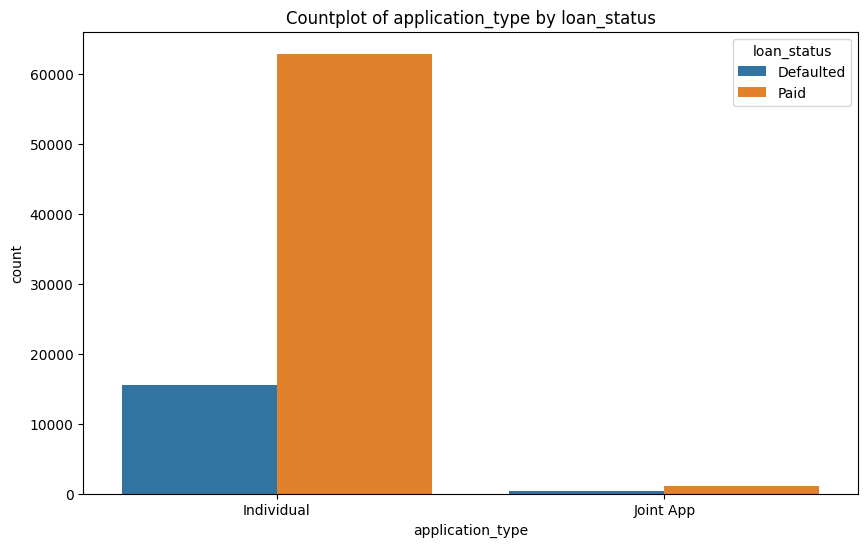

In [54]:
plot_countplot("application_type")

In [55]:
table('grade')

loan_status  Defaulted   Paid  Total  Default Percentage
grade                                                   
G                  257    279    536               47.95
F                  839   1046   1885               44.51
E                 2156   3464   5620               38.36
D                 3648   8288  11936               30.56
C                 5077  17448  22525               22.54
B                 3174  20328  23502               13.51
A                  819  13177  13996                5.85

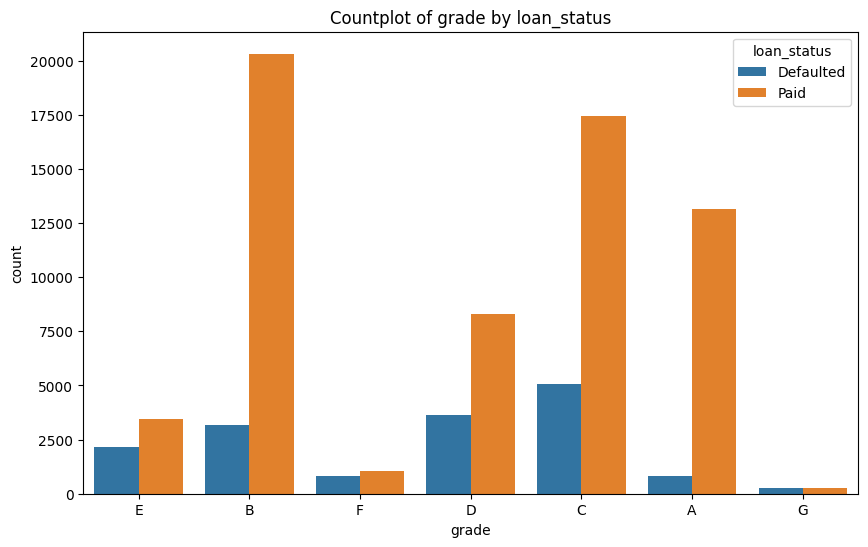

In [56]:
plot_countplot("grade")

In [57]:
table('sub_grade')

loan_status  Defaulted  Paid  Total  Default Percentage
sub_grade                                              
G5                  28    19     47               59.57
G4                  40    38     78               51.28
G3                  40    42     82               48.78
F5                 117   125    242               48.35
F4                 135   157    292               46.23
G1                  81    97    178               45.51
F1                 257   309    566               45.41
G2                  68    83    151               45.03
F3                 149   205    354               42.09
F2                 181   250    431               42.00
E5                 371   522    893               41.55
E4                 369   542    911               40.50
E3                 426   681   1107               38.48
E2                 475   803   1278               37.17
E1                 515   916   1431               35.99
D5                 589  1205   1794               32.83
D4                 698  1430   2128               32.80
D3                 754  1610   2364               31.90
D2                 754  1872   2626               28.71
D1                 853  2171   3024               28.21
C5                1028  2952   3980               25.83
C4                1097  3328   4425               24.79
C3                1025  3415   4440               23.09
C2                 990  3708   4698               21.07
C1                 937  4045   4982               18.81
B5                 815  4135   4950               16.46
B4                 748  4225   4973               15.04
B3                 631  4235   4866               12.97
B2                 527  3950   4477               11.77
B1                 453  3783   4236               10.69
A5                 281  3462   3743                7.51
A4                 218  2971   3189                6.84
A3                 126  2152   2278                5.53
A2                 100  2047   2147                4.66
A1                  94  2545   2639                3.56

In [58]:
plot_countplot("sub_grade")

In [59]:
table('verification_status')

loan_status          Defaulted   Paid  Total  Default Percentage
verification_status                                             
Verified                  5923  18953  24876               23.81
Source Verified           6506  24349  30855               21.09
Not Verified              3541  20728  24269               14.59

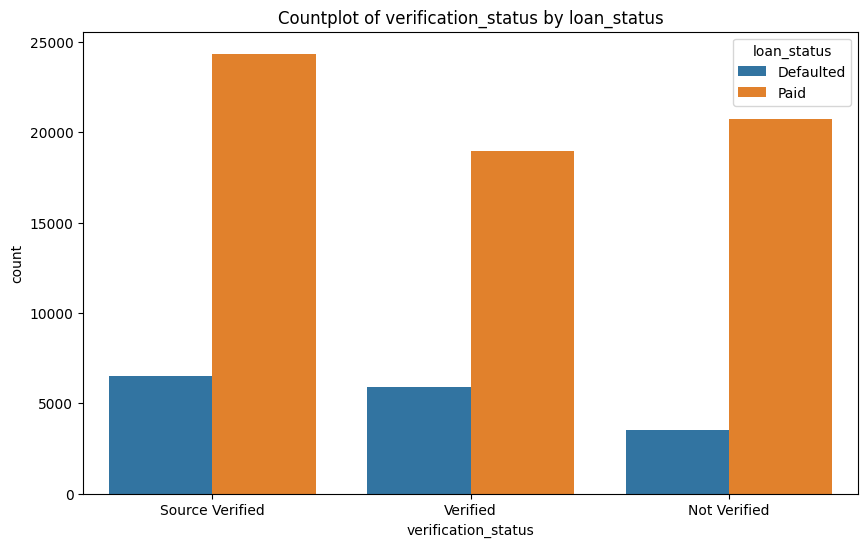

In [60]:
plot_countplot('verification_status')

In [61]:
categorical_columns

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

In [62]:
table('earliest_cr_line')

loan_status       Defaulted  Paid  Total  Default Percentage
earliest_cr_line                                            
May-64                    1     0      1               100.0
Sep-62                    1     0      1               100.0
Oct-58                    1     0      1               100.0
Jul-66                    1     0      1               100.0
Mar-55                    1     0      1               100.0
...                     ...   ...    ...                 ...
Mar-63                    0     3      3                 0.0
Mar-66                    0     1      1                 0.0
Mar-68                    0     3      3                 0.0
Mar-73                    0     8      8                 0.0
Jul-70                    0     3      3                 0.0

[640 rows x 4 columns]

## Data Preprocessing

Preprocessing involves preparing the data for analysis or modeling. It includes:

### Handling Missing Values
- Filling, imputing, or dropping missing data points.

### Encoding Categorical Variables
- Converting categorical variables into numerical formats that machine learning models can understand.

### Scaling and Normalization
- Adjusting the scale of numerical features to ensure they are on a similar scale.

### Feature Engineering
- Creating new features from existing data to improve model performance.

### Data Cleaning
- Removing or correcting erroneous data points.


In [63]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import pickle


### Treating the missing values by the help of the simple imputor and column transform

In [64]:
# List of numerical and categorical features to fill
num_features = ['mort_acc', 'pub_rec_bankruptcies', 'revol_util', 'num_actv_bc_tl', 'tot_cur_bal']
cat_features = ['emp_title', 'emp_length', 'title']

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_features),
        ('cat', SimpleImputer(strategy='most_frequent'), cat_features)
    ])

# Apply the transformations
df[num_features + cat_features] = preprocessor.fit_transform(df)




In [65]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [66]:
df[numerical_columns].shape,df[categorical_columns].shape

((80000, 9), (80000, 19))

# Handling the outlier

In [67]:
# Handle outliers in numerical columns using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                          df[column].median(), df[column])
    return df




In [68]:
for column in numerical_columns:
    handle_outliers(df, column)

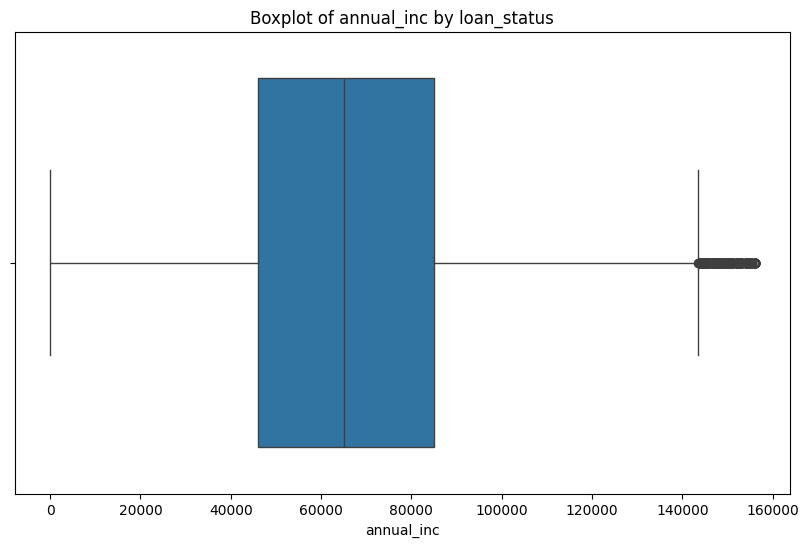

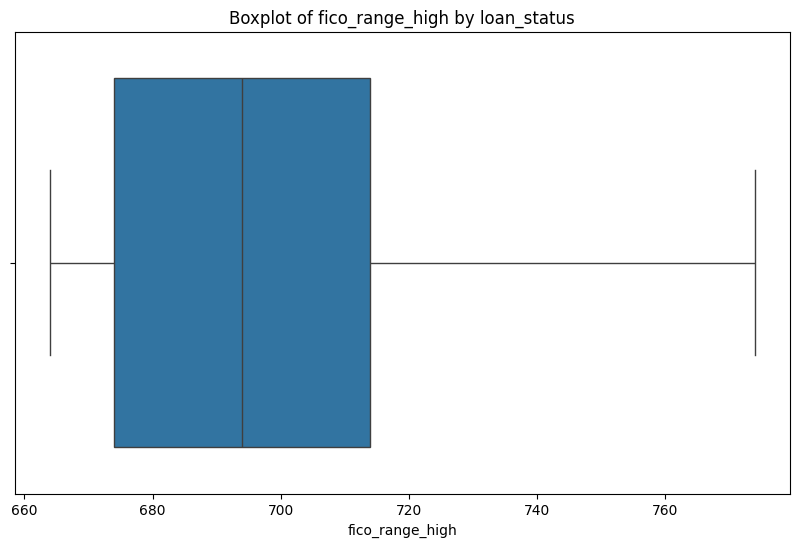

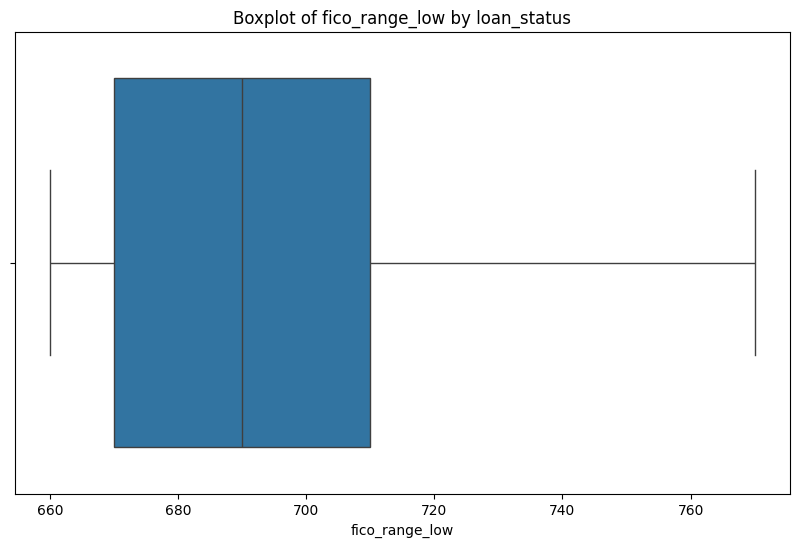

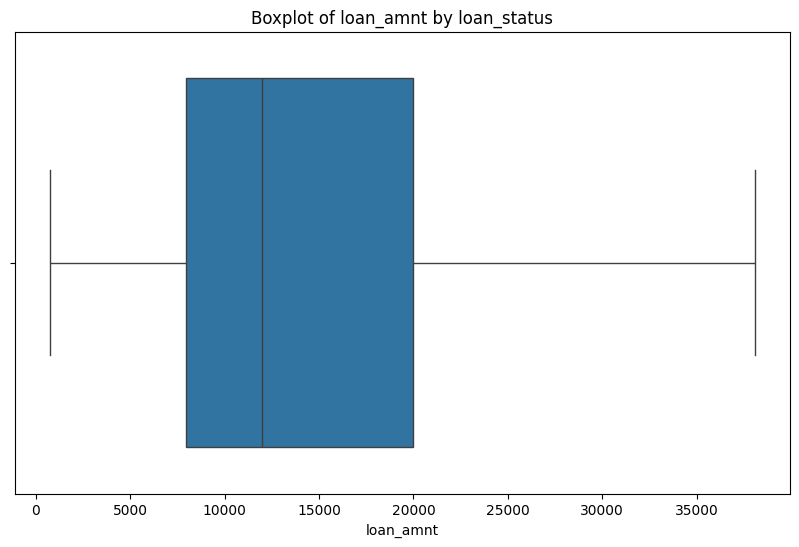

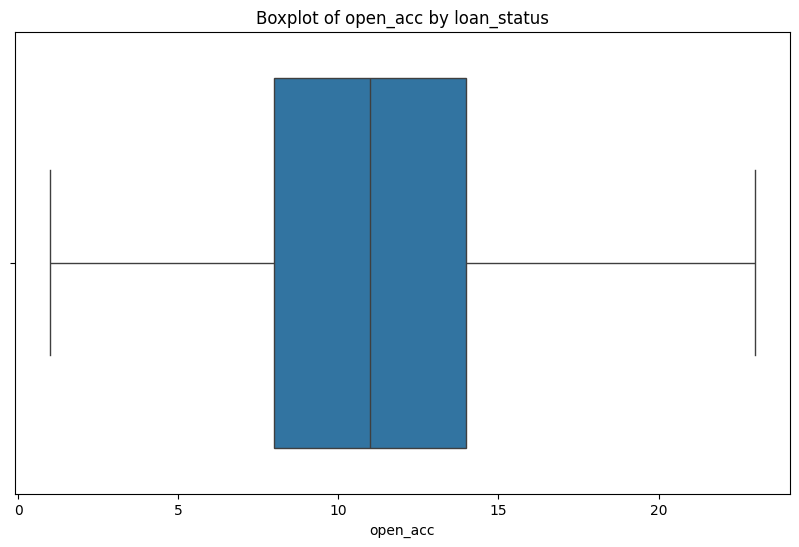

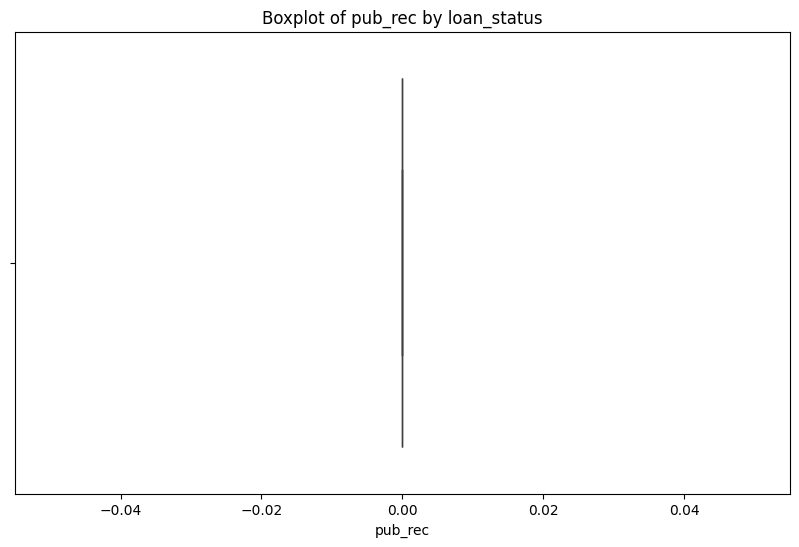

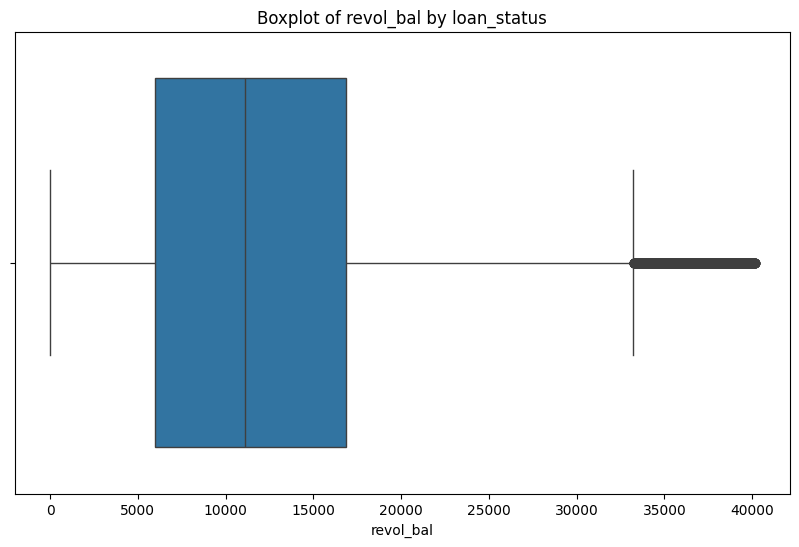

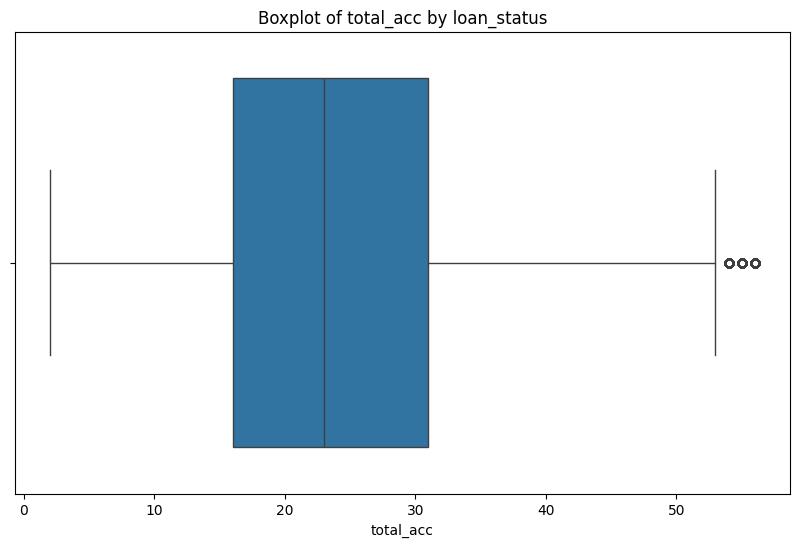

In [69]:
# Befor filling the missing values into the data set we firstly check the outlire   Plot boxplots for numerical variables to find the outlire
for column in numerical_columns:
    plot_boxplot(column)


In [70]:
# Check the result
print(df.isnull().sum())

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64


In [71]:
df.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0           Jul-97  10+ years   
1         CA     40000.0           Apr-87  10+ years   
2         FL     60000.0           Aug-07  10+ years   
3         IL    100742.0           Sep-80  10+ years   
4         MD     80000.0           Jul-99  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy            744.0           740.0     E   
1  Department of Veterans Affairs            724.0           720.0     B   
2                Marble polishing            679.0           675.0     B   
3                         printer            664.0           660.0     B   
4                   Southern Mgmt            669.0           665.0     F   

  home_ownership application_type  ... pub_rec_bankruptcies  \
0       MORTGAGE       Individual  ...                  0.0   
1           RENT       Individual  ...                  0.0   
2       MORTGAGE       Individual  ...                  0.0   
3       MORTGAGE       Individual  ...                  0.0   
4           RENT       Individual  ...                  0.0   

              purpose  revol_bal revol_util sub_grade        term  \
0  debt_consolidation     5338.0       93.6        E1   60 months   
1  debt_consolidation    19944.0       60.3        B1   36 months   
2  debt_consolidation    23199.0       88.5        B5   36 months   
3  debt_consolidation    18425.0       69.0        B2   36 months   
4  debt_consolidation    34370.0       90.0        F5   60 months   

                 title  total_acc verification_status loan_status  
0   Debt consolidation        8.0     Source Verified   Defaulted  
1          Credit Loan       12.0            Verified        Paid  
2   Debt consolidation       16.0     Source Verified        Paid  
3   Debt consolidation       19.0     Source Verified        Paid  
4  Debt Connsolidation       23.0            Verified        Paid  

[5 rows x 28 columns]

In [72]:
df.shape

(80000, 28)

In [73]:
df.isnull().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

# label encoder to convert the categorical number into the numerical

In [74]:
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    # The 'with open' block should be indented inside the for loop
    with open('label_encoder.pkl', 'wb') as file:
        pickle.dump(le, file)

In [75]:
df.head()

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0           5     85000.0               318           1       7926   
1           4     40000.0                40           1       7872   
2           9     60000.0                60           1      17127   
3          14    100742.0               620           1      35120   
4          20     80000.0               320           1      26487   

   fico_range_high  fico_range_low  grade  home_ownership  application_type  \
0            744.0           740.0      4               1                 0   
1            724.0           720.0      1               5                 0   
2            679.0           675.0      1               1                 0   
3            664.0           660.0      1               1                 0   
4            669.0           665.0      5               5                 0   

   ...  pub_rec_bankruptcies  purpose  revol_bal  revol_util  sub_grade  term  \
0  ...                     0        2     5338.0         938         20     1   
1  ...                     0        2    19944.0         605          5     0   
2  ...                     0        2    23199.0         887          9     0   
3  ...                     0        2    18425.0         692          6     0   
4  ...                     0        2    34370.0         902         29     1   

   title  total_acc  verification_status  loan_status  
0   1502        8.0                    1            0  
1   1082       12.0                    2            1  
2   1502       16.0                    1            1  
3   1502       19.0                    1            1  
4   1289       23.0                    2            1  

[5 rows x 28 columns]

# Spliting the data into dependent and independent

In [76]:
X=df.drop('loan_status',axis=1)
y = df['loan_status']


In [77]:
X.head()

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0           5     85000.0               318           1       7926   
1           4     40000.0                40           1       7872   
2           9     60000.0                60           1      17127   
3          14    100742.0               620           1      35120   
4          20     80000.0               320           1      26487   

   fico_range_high  fico_range_low  grade  home_ownership  application_type  \
0            744.0           740.0      4               1                 0   
1            724.0           720.0      1               5                 0   
2            679.0           675.0      1               1                 0   
3            664.0           660.0      1               1                 0   
4            669.0           665.0      5               5                 0   

   ...  pub_rec  pub_rec_bankruptcies  purpose  revol_bal  revol_util  \
0  ...      0.0                     0        2     5338.0         938   
1  ...      0.0                     0        2    19944.0         605   
2  ...      0.0                     0        2    23199.0         887   
3  ...      0.0                     0        2    18425.0         692   
4  ...      0.0                     0        2    34370.0         902   

   sub_grade  term  title  total_acc  verification_status  
0         20     1   1502        8.0                    1  
1          5     0   1082       12.0                    2  
2          9     0   1502       16.0                    1  
3          6     0   1502       19.0                    1  
4         29     1   1289       23.0                    2  

[5 rows x 27 columns]

In [78]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int32

# Scale numerical features using StandardScaler


In [79]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


In [80]:
X.head()

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0           5    0.593160               318           1       7926   
1           4   -0.946936                40           1       7872   
2           9   -0.262449                60           1      17127   
3          14    1.131920               620           1      35120   
4          20    0.422038               320           1      26487   

   fico_range_high  fico_range_low  grade  home_ownership  application_type  \
0         1.831797        1.831797      4               1                 0   
1         1.060123        1.060123      1               5                 0   
2        -0.676143       -0.676143      1               1                 0   
3        -1.254899       -1.254899      1               1                 0   
4        -1.061980       -1.061980      5               5                 0   

   ...  pub_rec  pub_rec_bankruptcies  purpose  revol_bal  revol_util  \
0  ...      0.0                     0        2  -0.819030         938   
1  ...      0.0                     0        2   0.856666         605   
2  ...      0.0                     0        2   1.230101         887   
3  ...      0.0                     0        2   0.682396         692   
4  ...      0.0                     0        2   2.511711         902   

   sub_grade  term  title  total_acc  verification_status  
0         20     1   1502  -1.517504                    1  
1          5     0   1082  -1.145737                    2  
2          9     0   1502  -0.773969                    1  
3          6     0   1502  -0.495143                    1  
4         29     1   1289  -0.123376                    2  

[5 rows x 27 columns]

# Here we using the smot libraries to deal with the imbalnce data

In [81]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_smote, y_smote = sm.fit_resample(X, y)


In [82]:
print('Before SMOTE oversampling X_train shape=',X.shape)
print('After SMOTE oversampling X_train shape=',X_smote.shape)

Before SMOTE oversampling X_train shape= (80000, 27)
After SMOTE oversampling X_train shape= (128060, 27)


# spliting the data into the train test

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)

In [84]:
X_train.head()

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
60783           27   -0.570468               501           1      28613   
106114          18   -1.192788               453           2      20645   
99457           14    0.270958               288           1      22149   
29451            4   -0.262449               630           1       3908   
46383           43   -1.015385               431           7      35962   

        fico_range_high  fico_range_low  grade  home_ownership  \
60783          0.288449        0.288449      1               1   
106114        -0.609014       -0.609014      4               5   
99457         -0.675446       -0.675446      2               2   
29451         -0.097388       -0.097388      0               1   
46383          2.603471        2.603471      0               1   

        application_type  ...  pub_rec  pub_rec_bankruptcies  purpose  \
60783                  0  ...      0.0                     0        1   
106114                 0  ...      0.0                     0        2   
99457                  0  ...      0.0                     0        1   
29451                  0  ...      0.0                     0        9   
46383                  0  ...      0.0                     0        2   

        revol_bal  revol_util  sub_grade  term  title  total_acc  \
60783   -0.690651         180          6     0   1139   2.478997   
106114  -0.087301         914         20     1   1502  -1.028615   
99457    1.345226         729         13     0   1365   0.608752   
29451   -1.313043          32          0     0   3047   0.434276   
46383   -0.945689         264          4     0   1502  -0.959853   

        verification_status  
60783                     0  
106114                    1  
99457                     2  
29451                     0  
46383                     2  

[5 rows x 27 columns]

In [85]:
y_train.head()

60783     0
106114    0
99457     0
29451     1
46383     1
Name: loan_status, dtype: int32

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
class HyperParameterForClassification:
    # Private attributes for author details
    __name = "Ashwani Kumar"
    __age = 26
    __gender = 'male'
    __info = '''A Data Analyst and Machine Learning enthusiast with a robust background in Electronics and Communication Engineering.
    My passion lies in harnessing the power of data to drive meaningful insights and innovative solutions. With hands-on experience in quality control and business development,
    I am committed to leveraging my skills in Python, SQL, and machine learning to solve complex challenges.'''

    def get_details(self):
        # Returns a formatted string containing the details of the person who wrote the program
        return f'''The name of the person who wrote this program is {self.__name}, age {self.__age}, gender {self.__gender}.
        He is a {self.__info}'''

    def __init__(self):
        # Constructor method, currently no initialization needed
        pass

    def hyper_tuning_log(self, X_train, y_train):
        """
        Performs hyperparameter tuning for Logistic Regression using GridSearchCV.
        :param X_train: Training data features
        :param y_train: Training data labels
        :return: Best parameters for LogisticRegression
        """
        # Define the hyperparameter grid
        param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

        # Initialize the Logistic Regression model
        log = LogisticRegression()

        # Set up the GridSearchCV
        grid_search = GridSearchCV(estimator=log,
                                   param_grid=param,
                                   cv=5,  # 5-fold cross-validation
                                   n_jobs=-1,  # Use all available cores
                                   scoring='accuracy',  # Use accuracy to score the models
                                   return_train_score=True)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)

        # Print and return the best parameters and score
        print("Best parameters for LogisticRegression:", grid_search.best_params_)
        print("Best score for LogisticRegression:", grid_search.best_score_)
        return grid_search.best_params_

    def hyper_tuning_rf(self, X_train, y_train):
        """
        Performs hyperparameter tuning for Random Forest using GridSearchCV.
        :param X_train: Training data features
        :param y_train: Training data labels
        :return: Best parameters for RandomForestClassifier
        """
        # Define the hyperparameter grid
        param = {'n_estimators': [10, 50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10]}

        # Initialize the RandomForest model
        rf = RandomForestClassifier()

        # Set up the GridSearchCV
        grid_search = GridSearchCV(estimator=rf,
                                   param_grid=param,
                                   cv=5,  # 5-fold cross-validation
                                   n_jobs=-1,  # Use all available cores
                                   scoring='accuracy',  # Use accuracy to score the models
                                   return_train_score=True)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)

        # Print and return the best parameters and score
        print("Best parameters for RandomForest:", grid_search.best_params_)
        print("Best score for RandomForest:", grid_search.best_score_)
        return grid_search.best_params_

    def hyper_tuning_svm(self, X_train, y_train):
        """
        Performs hyperparameter tuning for Support Vector Machine (SVM) using GridSearchCV.
        :param X_train: Training data features
        :param y_train: Training data labels
        :return: Best parameters for SVC
        """
        # Define the hyperparameter grid
        param = {'C': [0.1, 1, 10, 100],
                 'gamma': [1, 0.1, 0.01, 0.001],
                 'kernel': ['rbf', 'poly', 'sigmoid']}

        # Initialize the SVC model
        svm = SVC()

        # Set up the GridSearchCV
        grid_search = GridSearchCV(estimator=svm,
                                   param_grid=param,
                                   cv=5,  # 5-fold cross-validation
                                   n_jobs=-1,  # Use all available cores
                                   scoring='accuracy',  # Use accuracy to score the models
                                   return_train_score=True)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)

        # Print and return the best parameters and score
        print("Best parameters for SVM:", grid_search.best_params_)
        print("Best score for SVM:", grid_search.best_score_)
        return grid_search.best_params_

    def hyper_tuning_knn(self, X_train, y_train):
        """
        Performs hyperparameter tuning for K-Nearest Neighbors (KNN) using GridSearchCV.
        :param X_train: Training data features
        :param y_train: Training data labels
        :return: Best parameters for KNeighborsClassifier
        """
        # Define the hyperparameter grid
        param = {'n_neighbors': [3, 5, 11, 19],
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan']}

        # Initialize the KNeighborsClassifier model
        knn = KNeighborsClassifier()

        # Set up the GridSearchCV
        grid_search = GridSearchCV(estimator=knn,
                                   param_grid=param,
                                   cv=5,  # 5-fold cross-validation
                                   n_jobs=-1,  # Use all available cores
                                   scoring='accuracy',  # Use accuracy to score the models
                                   return_train_score=True)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)

        # Print and return the best parameters and score
        print("Best parameters for KNN:", grid_search.best_params_)
        print("Best score for KNN:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
    # Print the best parameters and score
    def hyper_tunning_dt(self,X_train, y_train):
      model=DecisionTreeClassifier()
      param = {
          'max_depth': [None, 10,

# Example usage:
programmer = HyperParameterForClassification()
print(programmer.get_details())

# Assuming X_train and y_train are your training data, you would call the methods like this:
# best_params_log = programmer.hyper_tuning_log(X_train, y_train)
# best_params_rf = programmer.hyper_tuning_rf(X_train, y_train)
# best_params_svm = programmer.hyper_tuning_svm(X_train, y_train)
# best_params_knn = programmer.hyper_tuning_knn(X_train, y_train)


In [ ]:
dd=Hyper_peramerter()

In [ ]:
dd.hyper_tunning_log(X_train, y_train)

Best parameters for LogisticRegression: {'C': 100}
Best score for LogisticRegression: 0.6477334843042324


{'C': 100}

In [86]:
class Hyper_peramerter_tuning:
    __name = "Ashwani Kumar"  # Private attribute
    __age = 26  # Private attribute
    __gender = 'male'  # Private attribute
    __info='''A Data Analyst and Machine Learning enthusiast with a robust background in Electronics and Communication Engineering.
     My passion lies in harnessing the power of data to drive meaningful insights and innovative solutions. With hands-on experience in quality control and business development,
     I am committed to leveraging my skills in Python, SQL, and machine learning to solve complex challenges."
'''  # Private attribute
    def get_details(self):
        return f'''The name of the person who wrote this program is {self.__name}, age {self.__age}, gender {self.__gender} ."
        'He is a {self.__info}'''

    def __init__(self):
        pass
    def __init__(self,model,param):
        self.model=model
        self.param=param
    def hyper_tunning_rf(self,X_train, y_train):
        grid_search = GridSearchCV(estimator=self.model,
                               param_grid=self.param,
                               cv=2,
                               n_jobs=-1,
                               scoring='accuracy',
                               return_train_score=True)
        grid_search.fit(X_train, y_train)
        print("Best parameters for RandomForestClassifier:", grid_search.best_params_)
        print("Best score for RandomForestClassifier:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
        # Print the best parameters and score
    def hyper_tunning_gb(self,X_train, y_train):
        grid_search = GridSearchCV(estimator=self.model,
                               param_grid=self.param,
                               cv=2,
                               n_jobs=-1,
                               scoring='accuracy',
                               return_train_score=True)
        grid_search.fit(X_train, y_train)
        print("Best parameters for GradientBoostingClassifier:", grid_search.best_params_)
        print("Best score for GradientBoostingClassifier:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
        # Print the best parameters and score
    def hyper_tunning_ada(self,X_train, y_train):
        grid_search = GridSearchCV(estimator=self.model,
                               param_grid=self.param,
                               cv=2,
                               n_jobs=-1,
                               scoring='accuracy',
                               return_train_score=True)
        grid_search.fit(X_train, y_train)
        print("Best parameters for AdaBoostClassifier:", grid_search.best_params_)
        print("Best score for AdaBoostClassifier:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
        # Print the best parameters and score
    def hyper_tunning_knn(self,X_train, y_train):
        grid_search = GridSearchCV(estimator=self.model,
                               param_grid=self.param,
                               cv=2,
                               n_jobs=-1,
                               scoring='accuracy',
                               return_train_score=True)
        grid_search.fit(X_train, y_train)
        print("Best parameters for KNeighborsClassifier:", grid_search.best_params_)
        print("Best score for KNeighborsClassifier:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
        # Print the best parameters and score
    def hyper_tunning_svc(self,X_train, y_train):
        grid_search = GridSearchCV(estimator=self.model,
                               param_grid=self.param,
                               cv=2,
                               n_jobs=-1,
                               scoring='accuracy',
                               return_train_score=True)
        grid_search.fit(X_train, y_train)
        print("Best parameters for SVC:", grid_search.best_params_)
        print("Best score for SVC:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
        # Print the best parameters and score
        # Fit the Grid Search to the data
        # Print the best parameters and score
    def hyper_tunning_log(self,X_train, y_train):
        grid_search = GridSearchCV(estimator=self.model,
                               param_grid=self.param,
                               cv=2,
                               n_jobs=-1,
                               scoring='accuracy',
                               return_train_score=True)
        grid_search.fit(X_train, y_train)
        print("Best parameters for LogisticRegression:", grid_search.best_params_)
        print("Best score for LogisticRegression:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
        # Print the best parameters and score
    def hyper_tunning_dt(self,X_train, y_train):
        grid_search = GridSearchCV(estimator=self.model,
                               param_grid=self.param,
                               cv=2,
                               n_jobs=-1,
                                   scoring='accuracy',
                               return_train_score=True)
        grid_search.fit(X_train, y_train)
        print("Best parameters for DecisionTreeClassifier:", grid_search.best_params_)
        print("Best score for DecisionTreeClassifier:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
        # Print the best parameters and score
    def hyper_tunning_xgb(self,X_train, y_train):
        grid_search = GridSearchCV(estimator=self.model,
                               param_grid=self.param,
                               cv=2,
                               n_jobs=-1,
                               scoring='accuracy',
                               return_train_score=True)
        grid_search.fit(X_train, y_train)
        print("Best parameters for XGBClassifier:", grid_search.best_params_)
        print("Best score for XGBClassifier:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
        # Print the best parameters and score
    def hyper_tunning_lgbm(self,X_train, y_train):
        grid_search = GridSearchCV(estimator=self.model,
                               param_grid=self.param,
                               cv=2,
                               n_jobs=-1,
                                   scoring='accuracy',
                                   return_train_score=True)
        grid_search.fit(X_train, y_train)
        print("Best parameters for LGBMClassifier:", grid_search.best_params_)
        print("Best score for LGBMClassifier:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
        # Print the best parameters and score

    def hyper_tunning_cat(self,X_train, y_train):
        grid_search = GridSearchCV(estimator=self.model,
                               param_grid=self.param,
                               cv=2,
                               n_jobs=-1,
                                   scoring='accuracy',
                                   return_train_score=True)
        grid_search.fit(X_train, y_train)
        print("Best parameters for CatBoostClassifier:", grid_search.best_params_)
        print("Best score for CatBoostClassifier:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
        # Print the best parameters and score
    def hyper_tunning_nn(self,X_train, y_train):
        grid_search = GridSearchCV(estimator=self.model,
                               param_grid=self.param,
                               cv=2,
                               n_jobs=-1,
                               scoring='accuracy',
                               return_train_score=True)
        grid_search.fit(X_train, y_train)
        print("Best parameters for MLPClassifier:", grid_search.best_params_)
        print("Best score for MLPClassifier:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
        # Print the best parameters and score
    def hyper_tunning_lr(self,X_train, y_train):
        grid_search = GridSearchCV(estimator=self.model,
                               param_grid=self.param,
                               cv=2,
                               n_jobs=-1,
                               scoring='accuracy',
                               return_train_score=True)
        grid_search.fit(X_train, y_train)
        print("Best parameters for LogisticRegression:", grid_search.best_params_)
        print("Best score for LogisticRegression:", grid_search.best_score_)
        return grid_search.best_params_
        # Fit the Grid Search to the data
        # Print the best parameters and score

    def get_score(self,X_train,X_test,y_train,y_test):
        self.model.fit(X_train,y_train)
        self.model.score(X_test,y_test)
        return self.model.score(X_test,y_test)
    def cv(self,X_train,y_train):
        return GridSearchCV(self.model,self.param,cv=5)
    def fit(self,X_train,y_train):
        return self.cv(X_train,y_train).fit(X_train,y_train)


In [87]:
# from operator import mod
parm={
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model=RandomForestClassifier()


In [ ]:
hyper=Hyper_peramerter_tuning(model,parm)


In [ ]:
hyper.hyper_tunning_rf(X_train, y_train)

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for RandomForestClassifier: 0.8282738560049976


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

# Adaboss and Bosting Algorithem use for model bulding

In [ ]:
from math import pi
models={
    'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'AdaBoost':AdaBoostClassifier()
}
pipelines={}
for name,model in models.items():
    pipelines[name]=Pipeline([
        ('model',model)
    ])
    pipelines[name].fit(X_train,y_train)
    print(name,pipelines[name].score(X_test,y_test))
    y_pred=pipelines[name].predict(X_test)
    print(name,accuracy_score(y_test,y_pred))
    print(name,classification_report(y_test,y_pred))

Random Forest 0.8449554896142433
Random Forest 0.8449554896142433
Random Forest               precision    recall  f1-score   support

           0       0.87      0.80      0.84     12682
           1       0.82      0.88      0.85     12930

    accuracy                           0.84     25612
   macro avg       0.85      0.84      0.84     25612
weighted avg       0.85      0.84      0.84     25612

Gradient Boosting 0.8160237388724035
Gradient Boosting 0.8160237388724035
Gradient Boosting               precision    recall  f1-score   support

           0       0.84      0.78      0.81     12682
           1       0.80      0.85      0.82     12930

    accuracy                           0.82     25612
   macro avg       0.82      0.82      0.82     25612
weighted avg       0.82      0.82      0.82     25612

AdaBoost 0.7569889114477588
AdaBoost 0.7569889114477588
AdaBoost               precision    recall  f1-score   support

           0       0.74      0.78      0.76     12682


Here we can compaire the output of the all model here and select the the best model which is provide the best accuracy . We can see the accuracy of the **Random forest** give the best accuracy  so we select the random forsest

Hypper perameter tuning

In [ ]:
def hyperparameter_tuning_rf(X_train, y_train):

    param_grid = {
        'max_depth': range(5, 15, 5),
        'min_samples_leaf': range(50, 150, 50),
        'min_samples_split': range(50, 150, 50),
        'n_estimators': [100, 200, 300],
        'max_features': [1, 2, 3]
    }
    rf = RandomForestClassifier()
    grid_search = GridSearchCV(estimator=rf,
                               param_grid=param_grid,
                               cv=2,
                               n_jobs=-1,
                               verbose=1,
                               return_train_score=True)

    grid_search.fit(X_train, y_train)
    print("Best parameters for RandomForestClassifier:", grid_search.best_params_)
    print("Best score for RandomForestClassifier:", grid_search.best_score_)

In [ ]:
hyperparameter_tuning_rf(X_train, y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
Best parameters for RandomForestClassifier: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}
Best score for RandomForestClassifier: 0.7569205841012026


In [ ]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=50,
                             min_samples_split=100,
                             max_features=3,
                             n_estimators=100)

In [ ]:
# Fit the model
rfc_bal_rus_model.fit(X_train, y_train)

# Make predictions
y_pred = rfc_bal_rus_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7548024363579572
              precision    recall  f1-score   support

           0       0.73      0.79      0.76     12682
           1       0.78      0.72      0.75     12930

    accuracy                           0.75     25612
   macro avg       0.76      0.76      0.75     25612
weighted avg       0.76      0.75      0.75     25612



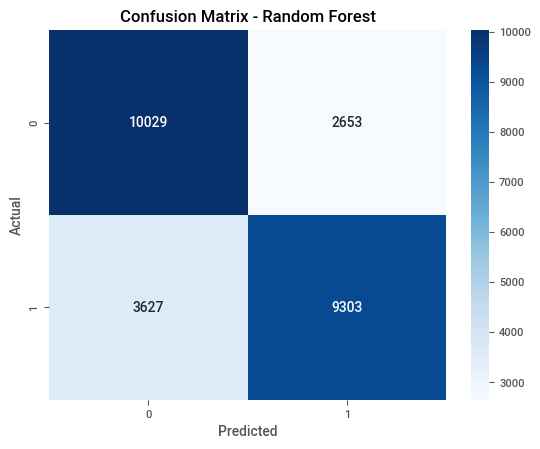

In [ ]:
rf_predictions = rfc_bal_rus_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
category=le.inverse_transform(rf_predictions)
result=pd.DataFrame(category,columns=['loan_status'])
result.head()

loan_status
0   Defaulted
1        Paid
2   Defaulted
3        Paid
4        Paid

# Boosting (Gradient Boosting)


In [ ]:
def hyperparameter_tuning_gb(X_train, y_train):
  # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }
    # Initialize the Grid Search
    gb = GradientBoostingClassifier(random_state=42)

    grid_search = GridSearchCV(estimator=gb,
                               param_grid=param_grid,
                               cv=2,
                               n_jobs=-1,
                               scoring='accuracy',
                               return_train_score=True)
    # Fit the Grid Search to the data
    grid_search.fit(X_train, y_train)
      # Print the best parameters and score
    print("Best parameters for GradientBoostingClassifier:", grid_search.best_params_)
    print("Best score for GradientBoostingClassifier:", grid_search.best_score_)


In [ ]:
hyperparameter_tuning_gb(X_train, y_train)

In [ ]:
gb_best_model=GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=200)
gb_best_model.fit(X_train, y_train)
gb_predictions = gb_best_model.predict(X_test)

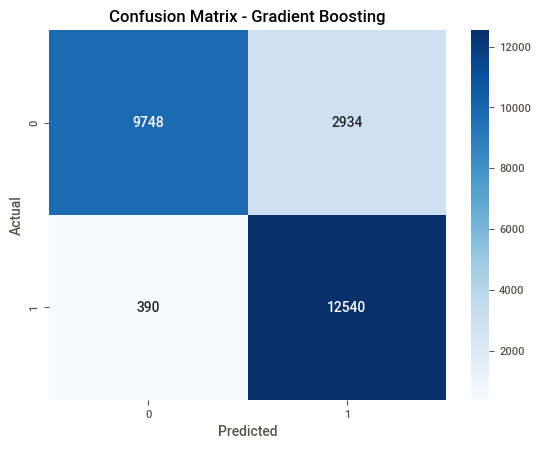

In [ ]:
sns.heatmap(confusion_matrix(y_test, gb_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("\nGradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))


Gradient Boosting Results:
Accuracy: 0.8702170857410588
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     12682
           1       0.81      0.97      0.88     12930

    accuracy                           0.87     25612
   macro avg       0.89      0.87      0.87     25612
weighted avg       0.89      0.87      0.87     25612



In [ ]:
predicted_categories = le.inverse_transform(gb_predictions)

result = pd.DataFrame(predicted_categories, columns=['loan_status'])
result.head()

loan_status
0        Paid
1        Paid
2   Defaulted
3        Paid
4        Paid

# ***Skewed data treatment for***
### Here we find the some skewed data we try to remove  the skewness  form the dataset and improve the model  **accuraccy**

In [ ]:
# Listing the columns
cols = numerical_columns
cols

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc'],
      dtype='object')

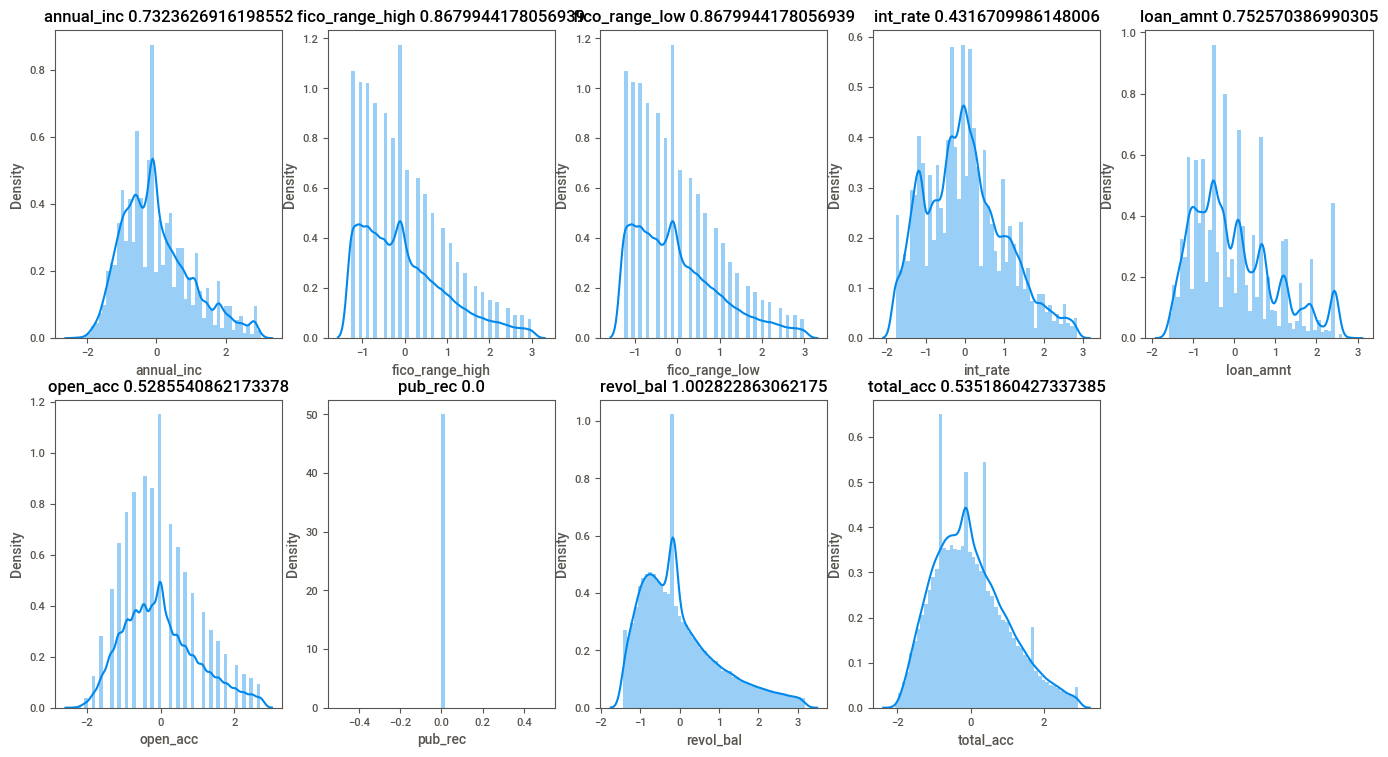

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df_yeojohnson_transformed = X.copy()
df_yeojohnson_transformed[cols] = pt.fit_transform(df_yeojohnson_transformed[cols])

df_yeojohnson_transformed.head()


addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0           5    0.718811               318           1       7926   
1           4   -1.014669                40           1       7872   
2           9   -0.121632                60           1      17127   
3          14    1.137713               620           1      35120   
4          20    0.571956               320           1      26487   

   fico_range_high  fico_range_low  grade  home_ownership  application_type  \
0         1.577550        1.577550      4               1                 0   
1         1.111670        1.111670      1               5                 0   
2        -0.639397       -0.639397      1               1                 0   
3        -1.594622       -1.594622      1               1                 0   
4        -1.256173       -1.256173      5               5                 0   

   ...  pub_rec  pub_rec_bankruptcies  purpose  revol_bal  revol_util  \
0  ...      0.0                     0        2  -0.882298         938   
1  ...      0.0                     0        2   0.989312         605   
2  ...      0.0                     0        2   1.234569         887   
3  ...      0.0                     0        2   0.862715         692   
4  ...      0.0                     0        2   1.901620         902   

   sub_grade  term  title  total_acc  verification_status  
0         20     1   1502  -1.755955                    1  
1          5     0   1082  -1.243093                    2  
2          9     0   1502  -0.760786                    1  
3          6     0   1502  -0.421487                    1  
4         29     1   1289  -0.003386                    2  

[5 rows x 27 columns]

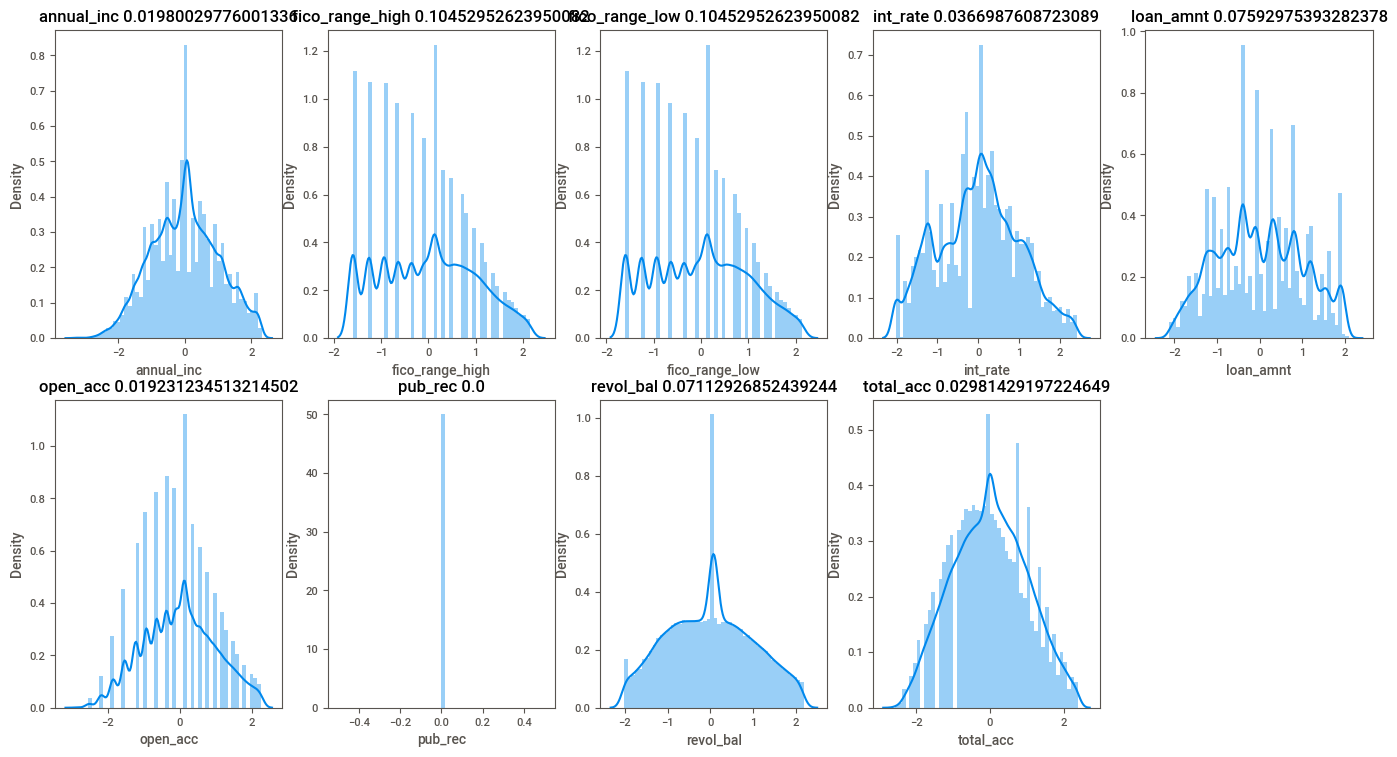

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(df_yeojohnson_transformed[col])
    plt.title(col+' '+str(df_yeojohnson_transformed[col].skew()))

In [ ]:
y1 = df['loan_status']

In [ ]:
X1=df_yeojohnson_transformed

In [ ]:
X1.head()

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0           5    0.718811               318           1       7926   
1           4   -1.014669                40           1       7872   
2           9   -0.121632                60           1      17127   
3          14    1.137713               620           1      35120   
4          20    0.571956               320           1      26487   

   fico_range_high  fico_range_low  grade  home_ownership  application_type  \
0         1.577550        1.577550      4               1                 0   
1         1.111670        1.111670      1               5                 0   
2        -0.639397       -0.639397      1               1                 0   
3        -1.594622       -1.594622      1               1                 0   
4        -1.256173       -1.256173      5               5                 0   

   ...  pub_rec  pub_rec_bankruptcies  purpose  revol_bal  revol_util  \
0  ...      0.0                     0        2  -0.882298         938   
1  ...      0.0                     0        2   0.989312         605   
2  ...      0.0                     0        2   1.234569         887   
3  ...      0.0                     0        2   0.862715         692   
4  ...      0.0                     0        2   1.901620         902   

   sub_grade  term  title  total_acc  verification_status  
0         20     1   1502  -1.755955                    1  
1          5     0   1082  -1.243093                    2  
2          9     0   1502  -0.760786                    1  
3          6     0   1502  -0.421487                    1  
4         29     1   1289  -0.003386                    2  

[5 rows x 27 columns]

### here we using the smote for outlire trearment

In [ ]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_smote, y_smote = sm.fit_resample(X1, y)


In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)

In [ ]:

models={
    'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'AdaBoost':AdaBoostClassifier()
}
pipelines={}
for name,model in models.items():
    pipelines[name]=Pipeline([
        ('model',model)
    ])
    pipelines[name].fit(x1_train,y1_train)
    print(name,pipelines[name].score(x1_test,y1_test))
    y_pred=pipelines[name].predict(x1_test)
    print(name,accuracy_score(y1_test,y_pred))
    print(name,classification_report(y1_test,y_pred))


Random Forest 0.8504997657348118
Random Forest 0.8504997657348118
Random Forest               precision    recall  f1-score   support

           0       0.89      0.80      0.84     12682
           1       0.82      0.90      0.86     12930

    accuracy                           0.85     25612
   macro avg       0.85      0.85      0.85     25612
weighted avg       0.85      0.85      0.85     25612

Gradient Boosting 0.8266047165391223
Gradient Boosting 0.8266047165391223
Gradient Boosting               precision    recall  f1-score   support

           0       0.86      0.78      0.82     12682
           1       0.80      0.88      0.84     12930

    accuracy                           0.83     25612
   macro avg       0.83      0.83      0.83     25612
weighted avg       0.83      0.83      0.83     25612

AdaBoost 0.7562470716851476
AdaBoost 0.7562470716851476
AdaBoost               precision    recall  f1-score   support

           0       0.74      0.78      0.76     12682


In [ ]:
hyperparameter_tuning_rf(x1_train, y1_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
Best parameters for RandomForestClassifier: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}
Best score for RandomForestClassifier: 0.7590289707949399


In [ ]:
# Bagging (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x1_train, y1_train)
rf_predictions = rf_model.predict(x1_test)



In [ ]:
rf_predictions=rf_model.predict(x1_test)
prediction_category=le.inverse_transform(rf_predictions)
result=pd.DataFrame(prediction_category,columns=['loan_status'])
result.head()

# Model-Based Feature Selection

In [ ]:
df.head()

In [ ]:
numerical_columns

In [ ]:
sacale=StandardScaler()
df[numerical_columns]=sacale.fit_transform(df[numerical_columns])


In [ ]:
df.head()

# features selection by  using the Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Assuming 'target' is your target variable column name
target = 'loan_status'  # Update with the actual target column if different
X = df.drop(columns=[target])
y = df[target]

# Train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Use SelectFromModel to select important features
model = SelectFromModel(rf, prefit=True)
X_new = model.transform(X)

# Get the selected feature names
selected_features = X.columns[(model.get_support())]

print("Selected features: ", selected_features)


In [ ]:
selected_features

In [ ]:
X=df[selected_features]
y = df['loan_status']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Listing the columns
col = X.columns
col

In [ ]:

cols=[]
for column in col:
    if column  in numerical_columns:
        cols.append(column)

        # X.drop(column, axis=1, inplace=True)

In [ ]:
df[cols].head()

In [ ]:
df.head()

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df_yeojohnson_transformed = X.copy()
df_yeojohnson_transformed[cols] = pt.fit_transform(df_yeojohnson_transformed[cols])

df_yeojohnson_transformed.head()


In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(df_yeojohnson_transformed[col])
    plt.title(col+' '+str(df_yeojohnson_transformed[col].skew()))

In [ ]:
X1=df_yeojohnson_transformed
y1 = df['loan_status']

In [ ]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_smote, y_smote = sm.fit_resample(X1, y1)


In [ ]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)

# Bagging (Random Forest)


In [ ]:

models={
    'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'AdaBoost':AdaBoostClassifier()
}
pipelines={}
for name,model in models.items():
    pipelines[name]=Pipeline([
        ('model',model)
    ])
    pipelines[name].fit(X2_train,y2_train)
    print(name,pipelines[name].score(X2_test,y2_test))
    y_pred=pipelines[name].predict(X2_test)
    print(name,accuracy_score(y2_test,y_pred))
    print(name,classification_report(y2_test,y_pred))


In [ ]:
hyperparameter_tuning_rf(X2_train, y2_train)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, max_features=3, min_samples_leaf=50, min_samples_split=50)
rf_model.fit(X2_train, y2_train)
rf_predictions = rf_model.predict(X2_test)

In [ ]:
print

In [ ]:
print(classification_report(y2_test, rf_predictions))
print(confusion_matrix(y2_test, rf_predictions))


In [ ]:
prediction=le.inverse_transform(rf_predictions)
result=pd.DataFrame(prediction,columns=['loan_status'])
result.head()

In [ ]:
with open('model.pkl','wb') as file:
    pickle.dump(rf_model,file)

# **Test the best model here by using  the test loan datset**

In [ ]:
test_df=pd.read_csv('/content/test_loan_data (1).csv')
test_df.head()

In [ ]:
test_df.shape

In [ ]:
test_df.isnull().sum()/test_df.shape[0]*100

In [ ]:
test_df.dropna(inplace=True)

In [ ]:
test_df.isnull().sum()

In [ ]:
test_df.shape

In [ ]:
test_df.duplicated().sum()

In [ ]:
col=['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_title', 'int_rate',
       'loan_amnt', 'tot_cur_bal', 'open_acc', 'revol_bal', 'revol_util',
       'sub_grade', 'total_acc']

In [ ]:
df1=test_df[col]

In [ ]:
# Here we further differentiate between numerical values ​​and categorical values## calc#ulation
numerical_columns = df1.select_dtypes(include=['float64','int64']).columns
categorical_columns = df1.select_dtypes(include=['object']).columns

In [ ]:
df1[numerical_columns].head()

In [ ]:
# Handle outliers in numerical columns using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                          df[column].median(), df[column])
    return df




In [ ]:
for column in numerical_columns:
    df1 = handle_outliers(df1, column)

In [ ]:
for column in numerical_columns:
    sns.boxplot(df1[column])
    plt.title(column)
    plt.show()

In [ ]:
for column in col:
    # df1[column] = df1[column].str.lower()
    df1[column] = le.fit_transform(df1[column])

In [ ]:
scaler=StandardScaler()
df1[numerical_columns]=scaler.fit_transform(df1[numerical_columns])

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df_yeojohnson_transformed = df1.copy()
df_yeojohnson_transformed[cols] = pt.fit_transform(df_yeojohnson_transformed[cols])

df_yeojohnson_transformed.head()


In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(df_yeojohnson_transformed[col])
    plt.title(col+' '+str(df_yeojohnson_transformed[col].skew()))

In [ ]:
X1=df_yeojohnson_transformed


In [ ]:
model=pickle.load(open('model.pkl','rb'))


In [ ]:
model.predict(X1)

In [ ]:
pred_1=model.predict(X1)
cartesian=le.inverse_transform(pred_1)
result=pd.DataFrame(cartesian,columns=['loan_status'])
result.head()